# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Refer to the Github repository for more [info](https://github.com/srpatel2000/Power-Outage-EDA). 

The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks) from Purdue University's website.

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

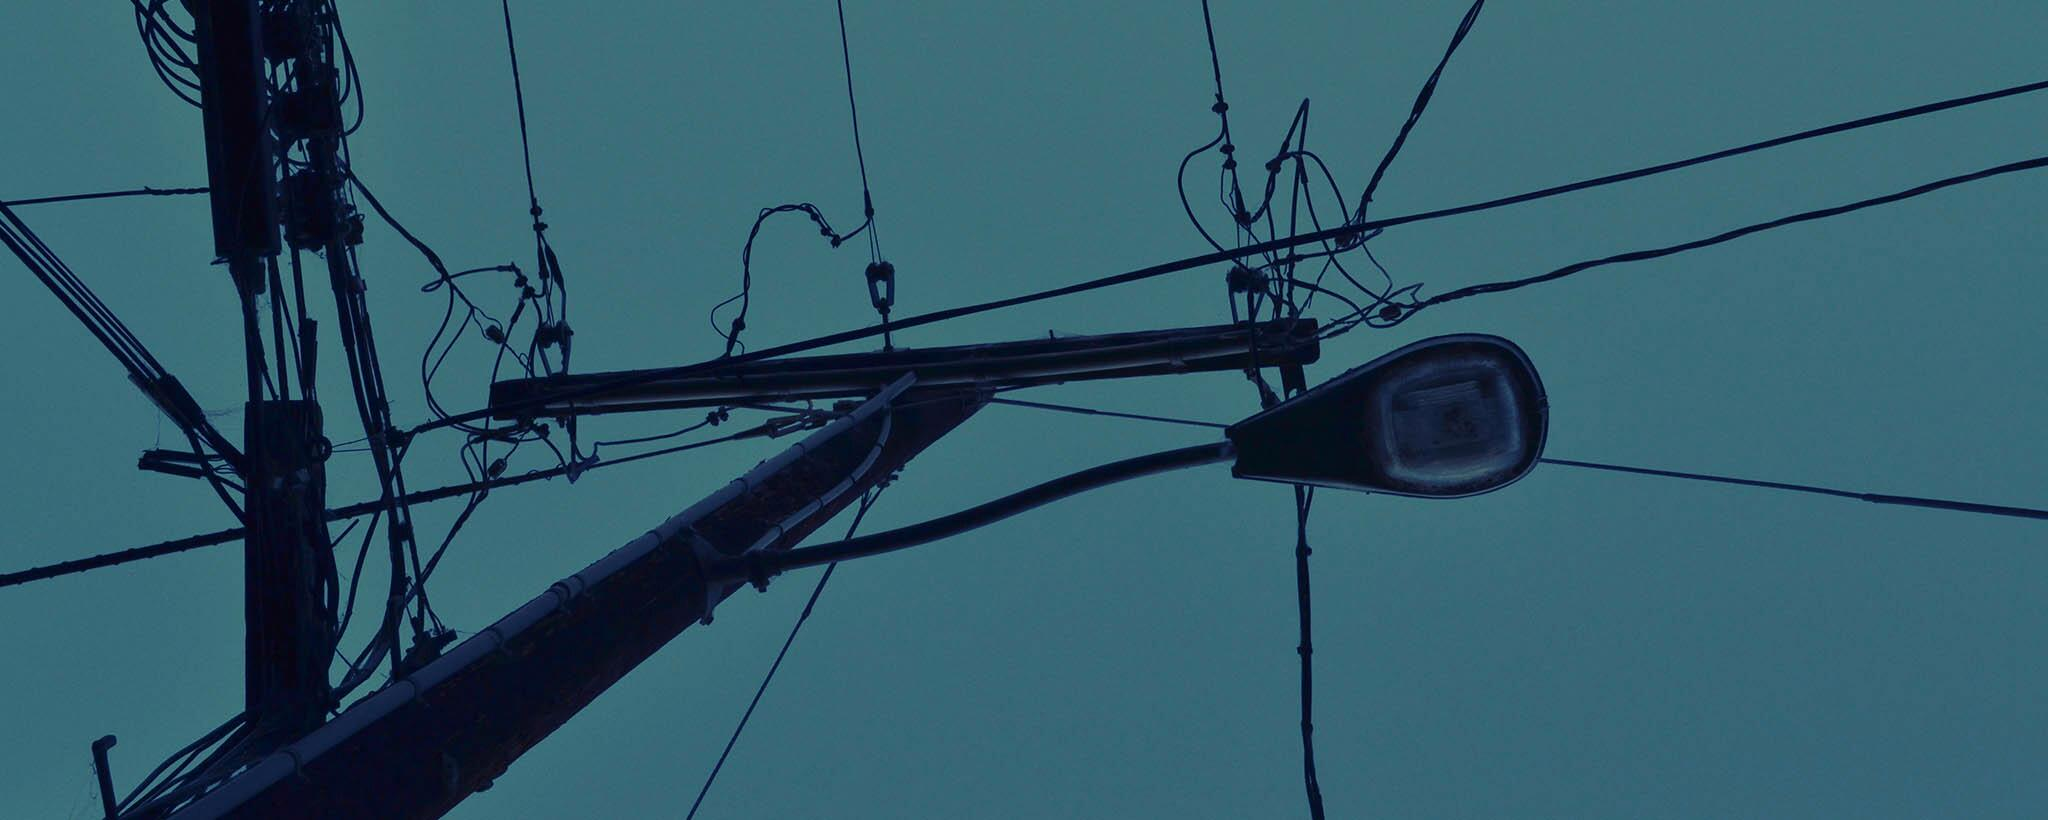

# Summary of Findings

### Project Goals
*First half of project*
1. Assess the quality of these datasets via exploratory data analysis
2. Assess the mechanism of missingness for some relevant portion of the dataset
3. Ask/answer a question about the dataset using a hypothesis test

*Second half of project*
4. Clearly state and frame a prediction problem (classification or regression); choose and justify an objective (e.g. accuracy vs f1-score)
5. Train a "baseline" model with generic set of features created for different kinds of data (e.g. ordinal encoding, one-hot encoding).
6. Engineer at least two new features from the data that improve the baseline model
7. Create an sklearn ML-pipeline; do a search for the best model and parameters using the pipeline.
8. Do an inference analysis on the results (i.e. does my model perform better on attribute X vs Y?)

### Cleaning and EDA
First, we had to clean our given dataset. When we first imported the set, the columns were not the correct names and the rows did not correctly represent the data generating process (DGP). In order to fix this, we obtained the relevant header names (which were located on row four), and made the column names equal to them. We also dropped the irrelevant 'variables' column that originally showed up because it did not matter in our analysis. Lastly, we set the observations equal to the index in order to more quickly find data. 

After reformatting the table to more correctly reflect the DGP, we combined the start date and time in order to create a summarized datetime column. We did the same for the end date and time in order to be uniform. We added these two columns to the dataframe in order to encompass a more precise dataset.

We also reformatted the dtypes of the columns that did not contain null values. This was in order to ensure that the DGP was accurate and so that future analysis would run smoother.

We then began our exploratory data analysis (EDA). In the EDA we focused on the above questions by creating graphs. More specifically, we performed univariate, bivariate, and aggregation analysis.

When performing univariate analysis, we mainly focused on finding where and when major power outages occur. We found that the main cause of power outages between 2000 and 2016 is severe weather followed by intentional attacks. We also found that most outages occur in states with higher populations. This may be due to the fact that states with a higher population tend to have more power plants, and therefore would be prone to having more outages. Going off of this fact, we found that the region that takes the most impact is the northeast region of the U.S. This would be fitting considering that many of these states (e.g. New York) have a high population density.

After visualizing this data, we knew we wanted to bring in the causes of the outages into our analysis. In our bivariate analysis we focused on how different outage causes affected rural versus urban populations. We created a spaghetti plot to see how the counts of different causes fluctuated by year. We noticed that severe weather was the main cause of outages up until 2011. Not only were there 269 overall outages this year, but intentional attacks took over as the biggest cause of outages. Upon doing research we can attribute the large amount of power outages to the 2011 Southwest Blackout Event. The outage was the result of 23 distinct events that occurred on 5 separate power grids in a span of 11 minutes. More information can be found here: https://www.nerc.com/pa/rrm/ea/Pages/September-2011-Southwest-Blackout-Event.aspx. This led us to wonder: how differently are urban versus rural areas affected by outages caused by intential attacks? We plotted a boxplot that conveyed how differently urban versus rural areas were affected by different causes. Although we found that intential attacks affected them at the same rate, severe weather did not.
So this led us to our hypothesis testing question: Are rural areas more prone to severe weather outages than urban areas? More information is in the Hypothesis Test Question of this summary. 

We also did some aggregation analysis be checking how many overall customers were affected by a specific cause. We did this in order to try to see why certain causes may affect rural areas more often. 

We split up the graphs that relate to our newly found hypothesis test and other fun visualizations we did while investigating our questions. We won't go into much detail about the findings in those, however we plan on utilizing those graphs for further analysis in the future so you can go ahead and take a look at them yourself. 

## First half of project: Hypothesis Testing

### Assessment of Missingness

In order to further understand our dataset and practice more data science skills, we decided to conduct an assessment of missingness. For this section, we decided to choose a particular non-trival column (column with a significant number of missing values) and run a Missing at Random Permutation Test. MAR data incidates that there is a relationship between the missingness of the data and another observed data. For example, men may be more comfortable to indicate their weight as opposed to women. This shows that, in a given dataset, the missingness of weight data could be dependent of the information of an individual's sex. 

Hypothesis for MAR (Missing at Random) Permutation Tests:
- Null hypothesis: The missingness of "OUTAGE.DURATION" is not dependent on the compared column data.
- Alt hypothesis: The missingness of "OUTAGE.DURATION" is dependent on the compared column data.


The column with nontrivial missingness data that we chose to analyze was 'OUTAGE.DURATION'. This column has 1476 non-null values out of the 1534 possible data entries. In order to determine 'OUTAGE.DURATION''s dependency of missingness, we conducted a KS-Statistic permutation test. The KS test is used to identify whether the two distributions are from the same continuous distribution. Using the KS statistic test, we were able to create two samples of data (one which contains the distribution of a column where OUTAGE.DURATION is null and the other which contains the distribution of a column where OUTAGE.DURATION is not null). After generating multiple sample through the 1000 simulations, we compared to our observed statistic which was the ks_2samp of our initial two independent samples. 

We used this permutation test, at a significance level of 0.05, to identify two columns within our dataset: one that OUTAGE.DURATION's missigness was dependent on (MAR) and one that OUTAGE.DURATION's missingness was not dependent on. The results of the permutation test showed that 'TOTAL.SALES' was able to reject null hypothesis with a p value of 0.0 and 'CUSTOMERS.AFFECTED' failed to reject the null hypothesis with a p value of 0.28. Rejecting the null hypothesis indicates that the distribution are not similar. Failing to reject the null hypothesis indicates that the distribution is similar. This result does make sense as there are many factors other than outage duration that will affect the missingness of customers affected. However, outage duration can directly affects the total sales which indicates total electricity consumption in the U.S. state.

### Hypothesis Test
As stated above, our hypothesis question was: Are rural areas more prone to outages caused by severe weather than urban areas? We came up with this questions because we observed that rural areas had a higher rate or outages related to weather compared to urban areas. This may be due to reasons such as rural areas having less infrastructure to protect their power plants from large weather disasters. In order to test whether or not the difference in number of power outages due to severe weather was due to chance, we performed a hypothesis test.

When testing this we maintained these hypotheses:
- Null: There is no difference in the amount that severe weather affects rural vs urban populations.
- Alternative: There is a statistically significant difference in the amount that severe weather affects rural vs urban populations. (However, we don't know why though)

We used the difference in medians between the two populations. 

Results: We performed 10,000 trials at a significance level 0.05. After receiving a p-value of 0.0, we concluded that we can reject the null hypothesis. In our dataset, we can conclude that there is a statistically significant difference in the amount that severe weather affects rural vs urban populations; however, we are unable to determine the specific factors that resulted in this difference.

## Second half of project (Prediction Modeling)

For this section, we chose to build a prediction model that can predict the cause of the major outages, using the discoveries from both the EDA and the hypothesis test.

Target Variable: CAUSE.CATEGORY

The performance of all classification models we designed are measured and compared using the accuracy evalution metric.

### Baseline Model

For the baseline model, we chose ['YEAR', 'POSTAL.CODE', 'CUSTOMERS.AFFECTED', 'POPPCT_URBAN'] as our initial columns. Through the analysis we conducted in the EDA, we deemed these columns the most revelant to predict the cause of outages.

Overview of our Selected Dataset:

- Year (ordinal): Certain causes are more prominent in certain years. For example, particularly in the year 2011, many of the outages can be attributed to the Southwest Blackout Event (more information the EDA description).
- Postal Code (nominal): As seen in the univariate analysis, there is a strong relationship between particular states and number of outages. This suggests that causes could be predicted based on the most common cause of outages of a particular location.
- Customers Affected (quantitative)
- Poppct Urban or Population Percentage Urban (quantitative): As we observed from the hypothesis test, outages caused by severe weather are more prominent in rural communities as opposed to urban communities. Through this observation, we decided to include this data to train our model.

Baseline Pipeline:
- Preprocessed The Data: Simple Imputer and One Hot Encoder
- Classifer: Decision Tree Classifier.

Evalution Metrics:
- Test Accuracy: 0.729
- Validation Accuracy: 0.721

### Engineer New Features
Through the analysis we conducted in the EDA, we choose to derive and engineer six more features to further improve the accuracy of the model in predicting the cause category of a given outage. In addition, the following features focus on providing further details regarding the duration or timing of the outage. Its importance can be seen through the observations from the bivariate analysis.

- Day of the week the outage occured (START.DAY.OF.WEEK)
- Day of the week the outage Was restored (RESTORATION.DAY.OF.WEEK)
- Hour an outage occured (START.HOUR)
- Hour the outage was restored (RESTORATION.HOUR)
- Number of Days Outage Occured (TOTAL.DAYS)
- State's population is more rural or urban dominated (IS.URBAN)

In addition to adding the new features to our dataset, we incoporated the Principal Component Analysis (PCA) to our preprocessing pipeline in order to handle highly correlated columns.

### Model and Parameter Testing
After engineering the features, we decided to compare various classifiers which will optimize our prediction model. We also optimized our parameters using Grid Search CV.

*Decision Tree Classifier:* 
- Test Accuracy: 0.718
- Validation Accuracy: 0.7399
*Decision Tree Classifier with Best Parameters:*
- Test Accuracy: 0.748
- Validation Accuracy: 0.746
*Random Forest Classifier:*
- Test Accuracy: 0.77
- Validation Accuracy: 0.750
*Random Forest Classfier with Best Parameters:*
- Test Accuracy: 0.783
- Validation Accuracy: 0.748
*KNN Classifier:*
- Test Accuracy: 0.752
- Validation Accuracy: 0.7399

From the given evaluation metrics, the Random Forest Classifier seems to be performing slightly better than the previous Decision Tree Classifier.

### Final Model
Our final model is trained on the data from ['YEAR', 'POSTAL.CODE', 'CUSTOMERS.AFFECTED', 'POPPCT_URBAN'] columns within the original dataset, along with our six engineered features stated above.

Within the preprocessing pipeline, we used a simple imputer to account for the missing data within the columns, a one hot encoder to quantify the categorical data, and a principal component analysis to handle highly correlated columns. Finally, we used the random forest classifier as our classification model.

After optimizing the parameters for the random forest classifier through Grid Search, the accuracy metrics are as follows:
- test_accuracy: 0.787
- validation_accuracy: 0.753

The accuracy increased 6 percent and the validation accuracy has increased by 3 percent from our initial baseline model.

### Fairness Evaluation
For the fairness evaluation, we chose to evaluate whether the model performed better when a larger group of customers was affected. We chose to do an accuracy parity evaluation since we had a multiclass classification model and found that accuracy was one of the easier ways to evaluate model fairness.

We split our data based on whether a large group of people were affected (a large number of people were affected if 50,000 or more people were affected, otherwise a small group of people were affected). We chose our cut off at 50,000 because we wanted our accuracy parity evaluation to determine whether or not our model performed equally well across all groups. Splitting up the values at 50,000 helped us split our dataset essentially in half, therefore our model should be classifying equally well across these two groups.

In order to perform this evaluation we performed a permutation test with these hypotheses:

Null hypothesis: The classifications of major power outages are "the same" when a small and large number of people are affected.

Alternative hypothesis: The classifications of major power outages are NOT "the same" when a small and large number of people are affected.

We set a significance level of 0.05. Essentially, we'd reject the null hypothesis for a p value less than .05 and we'd fail to reject the null hypothesis if it's greater than .05.

Since we got a p-value of 1.0, we can strongly fail to reject the null hypothesis. Therefore, the classifications of major power outages are "the same" when both small and large number of people are affected.

# Code

### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import folium
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA
#from util import tree_to_code
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score

import bqplot
from palettable.colorbrewer.diverging import *

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: No module named 'bqplot'

### Cleaning and EDA

#### _Cleaning_

Initial Reading of Excel Dataset:

In [3]:
fp = os.path.join('data', 'outage.xlsx')
outages = pd.read_excel(fp) #convert the file to dataframe

new_columns = outages.iloc[4] #get the relevant header names
filtered_outages = outages[6:]
filtered_outages.columns = new_columns #convert the column names in the original dataframe to the relevant ones

filtered_outages = filtered_outages.drop('variables', axis = 1) #drop the irrelevant 'variables' column

filtered_outages = filtered_outages.set_index('OBS', drop = True) #set the observations to the index

filtered_outages.columns.name = None #drop the name on the index

filtered_outages.head(2) #final cleaned dataframe

YEAR MONTH U.S._STATE POSTAL.CODE NERC.REGION      CLIMATE.REGION  \
OBS                                                                      
1    2011     7  Minnesota          MN         MRO  East North Central   
2    2014     5  Minnesota          MN         MRO  East North Central   

    ANOMALY.LEVEL CLIMATE.CATEGORY    OUTAGE.START.DATE OUTAGE.START.TIME  \
OBS                                                                         
1            -0.3           normal  2011-07-01 00:00:00          17:00:00   
2            -0.1           normal  2014-05-11 00:00:00          18:38:00   

     ... POPPCT_URBAN POPPCT_UC POPDEN_URBAN POPDEN_UC POPDEN_RURAL  \
OBS  ...                                                              
1    ...        73.27     15.28         2279    1700.5         18.2   
2    ...        73.27     15.28         2279    1700.5         18.2   

    AREAPCT_URBAN AREAPCT_UC PCT_LAND PCT_WATER_TOT PCT_WATER_INLAND  
OBS                                                                   
1            2.14        0.6  91.5927       8.40733          5.47874  
2            2.14        0.6  91.5927       8.40733          5.47874  

[2 rows x 55 columns]

Created Necessary Columns: 
- outage.start: combined start date and time
- outage.restoration: combined end date and time

In [4]:
filtered_outages['OUTAGE.START'] = (pd.to_datetime(filtered_outages['OUTAGE.START.DATE']) + 
                                    pd.to_timedelta(filtered_outages['OUTAGE.START.TIME'].astype(str)))

filtered_outages['OUTAGE.RESTORATION'] = (pd.to_datetime(filtered_outages['OUTAGE.RESTORATION.DATE']) + 
                                          pd.to_timedelta(filtered_outages['OUTAGE.RESTORATION.TIME'].astype(str)))
filtered_outages.head(2)

YEAR MONTH U.S._STATE POSTAL.CODE NERC.REGION      CLIMATE.REGION  \
OBS                                                                      
1    2011     7  Minnesota          MN         MRO  East North Central   
2    2014     5  Minnesota          MN         MRO  East North Central   

    ANOMALY.LEVEL CLIMATE.CATEGORY    OUTAGE.START.DATE OUTAGE.START.TIME  \
OBS                                                                         
1            -0.3           normal  2011-07-01 00:00:00          17:00:00   
2            -0.1           normal  2014-05-11 00:00:00          18:38:00   

     ... POPDEN_URBAN POPDEN_UC POPDEN_RURAL AREAPCT_URBAN AREAPCT_UC  \
OBS  ...                                                                
1    ...         2279    1700.5         18.2          2.14        0.6   
2    ...         2279    1700.5         18.2          2.14        0.6   

    PCT_LAND PCT_WATER_TOT PCT_WATER_INLAND        OUTAGE.START  \
OBS                                                               
1    91.5927       8.40733          5.47874 2011-07-01 17:00:00   
2    91.5927       8.40733          5.47874 2014-05-11 18:38:00   

     OUTAGE.RESTORATION  
OBS                      
1   2011-07-03 20:00:00  
2   2014-05-11 18:39:00  

[2 rows x 57 columns]

Set Appropriate Data Types to Columns:

In [5]:
filtered_outages[['YEAR', 'RES.CUSTOMERS', 'COM.CUSTOMERS', 'IND.CUSTOMERS','TOTAL.CUSTOMERS', 
                  'PC.REALGSP.STATE', 'PC.REALGSP.USA', 'UTIL.REALGSP','TOTAL.REALGSP', 
                  'POPULATION']] = filtered_outages.loc[:,['YEAR', 'RES.CUSTOMERS', 
                                                           'COM.CUSTOMERS', 'IND.CUSTOMERS','TOTAL.CUSTOMERS', 
                                                           'PC.REALGSP.STATE', 'PC.REALGSP.USA', 'UTIL.REALGSP',
                                                           'TOTAL.REALGSP', 'POPULATION']].astype(int)
filtered_outages[['U.S._STATE', 'POSTAL.CODE', 'NERC.REGION', 
                  'CAUSE.CATEGORY']] = filtered_outages.loc[:,['U.S._STATE', 'POSTAL.CODE', 'NERC.REGION', 
                                                               'CAUSE.CATEGORY']].astype(str) # string values
filtered_outages[['RES.CUST.PCT', 'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 
                  'PI.UTIL.OFUSA', 'POPPCT_URBAN', 'AREAPCT_URBAN','AREAPCT_UC', 'PCT_LAND', 'PCT_WATER_TOT', 
                  'PCT_WATER_INLAND', 'CUSTOMERS.AFFECTED']] = filtered_outages.loc[:,['RES.CUST.PCT', 
                                                                                       'COM.CUST.PCT', 
                                                                                       'IND.CUST.PCT', 
                                                                                       'PC.REALGSP.REL', 
                                                                                       'PC.REALGSP.CHANGE', 
                                                                                       'PI.UTIL.OFUSA', 
                                                                                       'POPPCT_URBAN', 
                                                                                       'AREAPCT_URBAN',
                                                                                       'AREAPCT_UC', 'PCT_LAND', 
                                                                                       'PCT_WATER_TOT', 
                                                                                       'PCT_WATER_INLAND',
                                                                                       'CUSTOMERS.AFFECTED']
                                                                                   ].astype(float)
filtered_outages[['MONTH', 'ANOMALY.LEVEL', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW', 'RES.PRICE', 'COM.PRICE', 
                  'IND.PRICE', 'TOTAL.SALES', 'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN', 'POPDEN_UC']
                ] = filtered_outages.loc[:,['MONTH', 'ANOMALY.LEVEL', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW', 
                                            'RES.PRICE', 'COM.PRICE', 'IND.PRICE', 'TOTAL.SALES', 'RES.PERCEN', 
                                            'COM.PERCEN', 'IND.PERCEN', 'POPDEN_UC']].astype(float)

In [6]:
filtered_outages.dtypes.head() #check that the values are correct

YEAR             int64
MONTH          float64
U.S._STATE      object
POSTAL.CODE     object
NERC.REGION     object
dtype: object

#### _EDA_

_Univariate Analysis_

Plot 1: Distribution of Causes

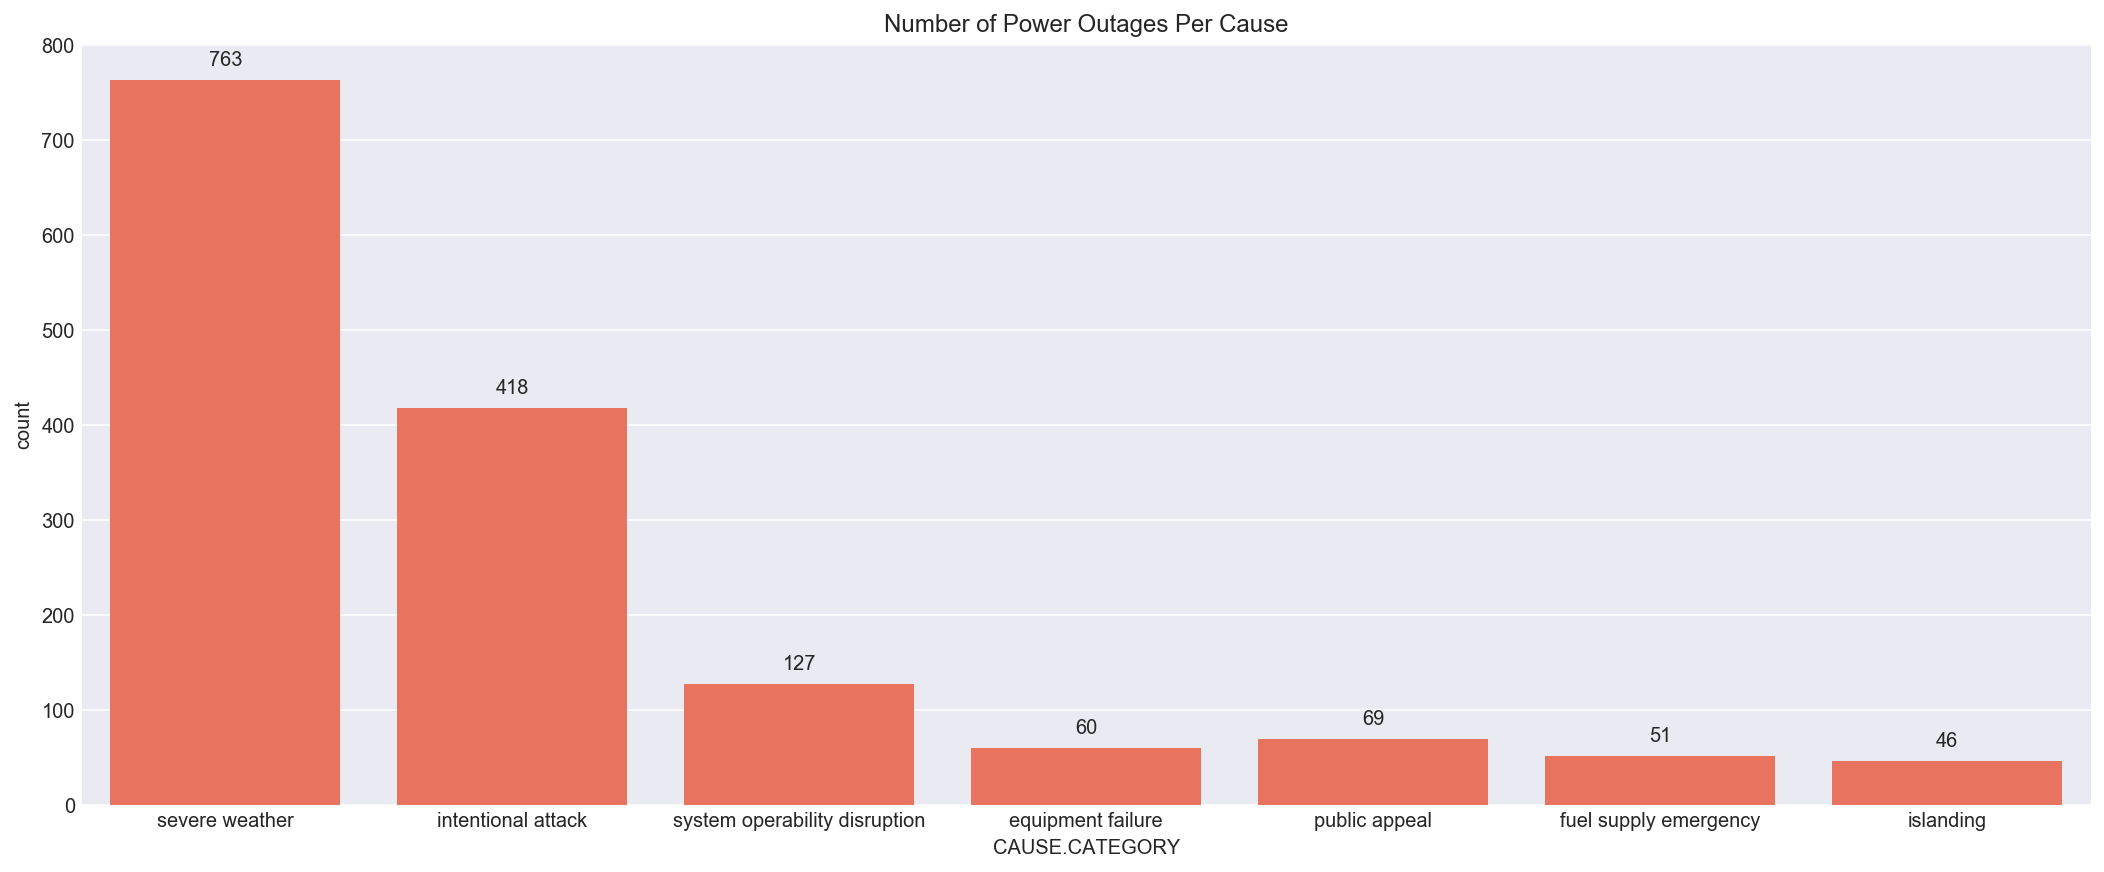

In [7]:
plt.style.use("seaborn-darkgrid")
plt.figure(figsize=(18,7))
cause_distribution = sns.countplot(x='CAUSE.CATEGORY',data=filtered_outages, color="tomato")
cause_distribution.set_title('Number of Power Outages Per Cause')
for p in cause_distribution.patches:
    cause_distribution.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., 
                                                                p.get_height()), ha = 'center', va = 'center', 
                                xytext = (0, 10), textcoords = 'offset points')

As you can see above, most power outages were caused by severe weather in the dataset

Plot 2: Outage Distribution Over Postal Codes

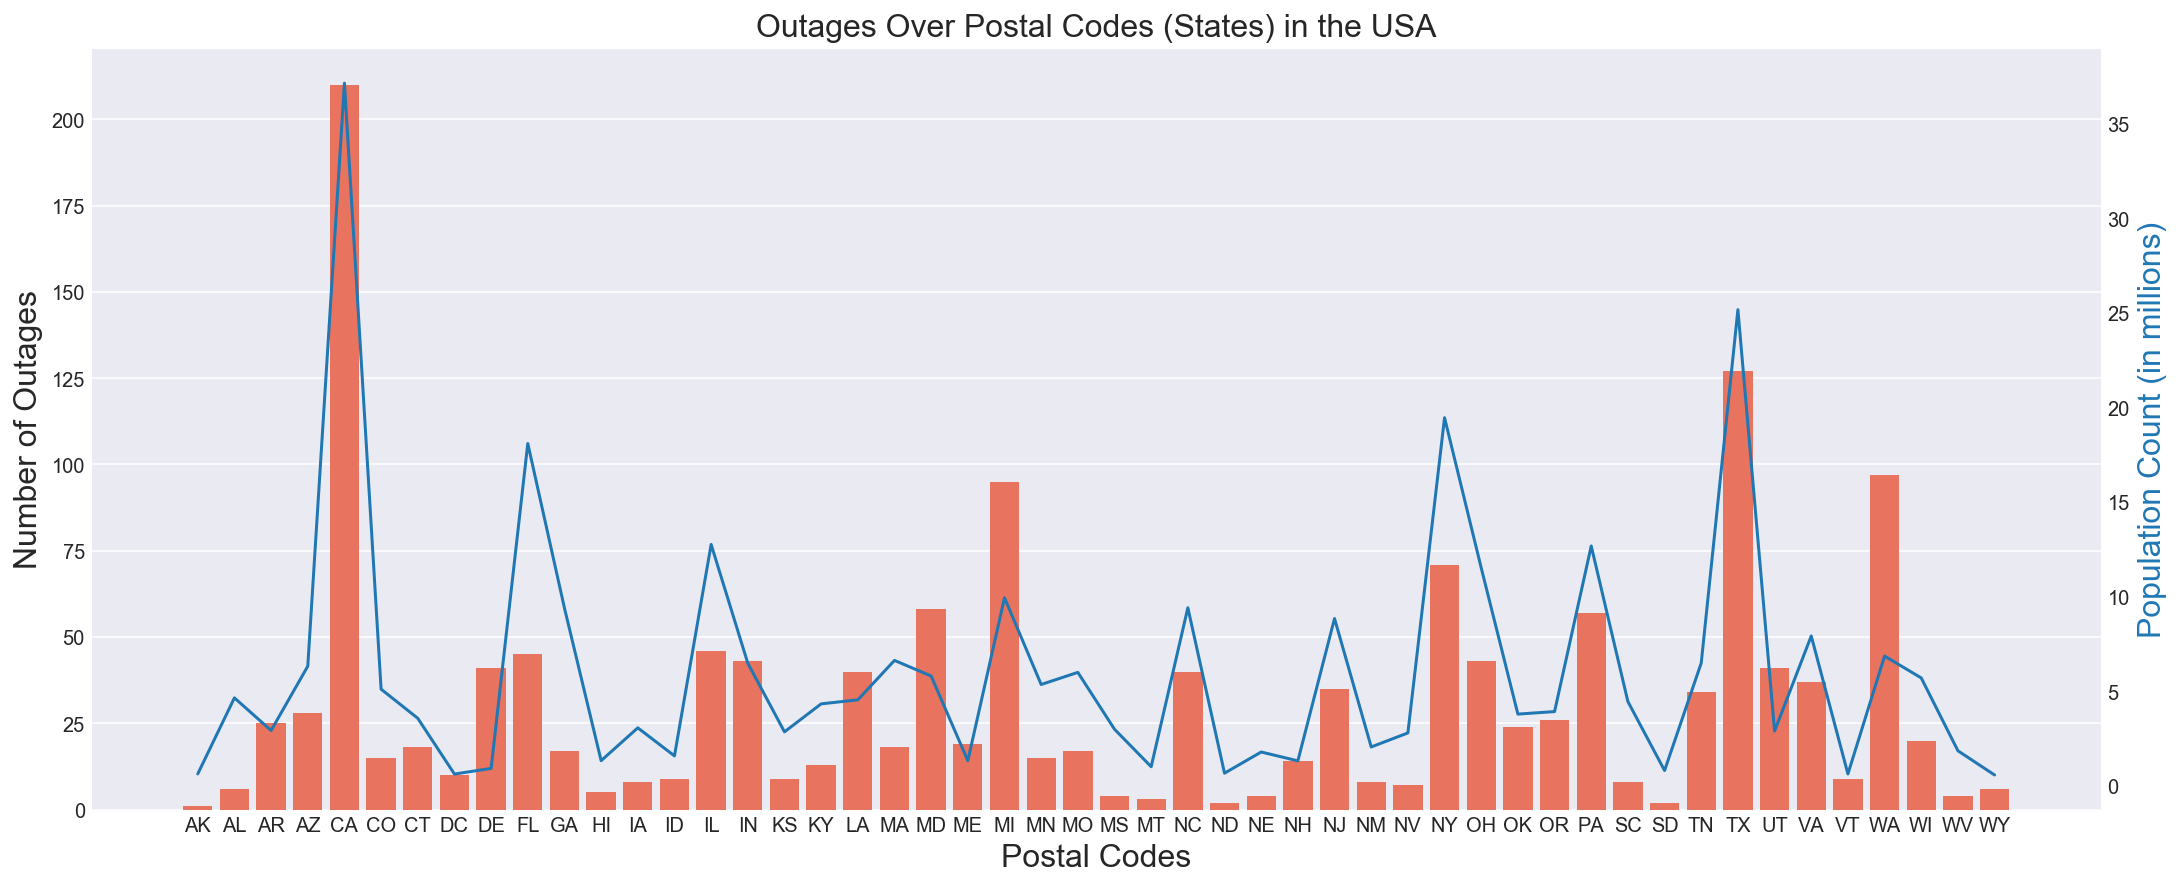

In [8]:
sorted_table = filtered_outages.sort_values('POSTAL.CODE') #sort postal code so graph is easier to read
sorted_table.head()

pop = list(sorted_table[['POSTAL.CODE','POPULATION']].groupby('POSTAL.CODE').mean()['POPULATION'])
for i in range(len(pop)):
    pop[i] = pop[i]/1000000
pc = list(sorted_table[['POSTAL.CODE','POPULATION']].groupby('POSTAL.CODE').mean().index)

#Create combo chart
fig, ax1 = plt.subplots(figsize=(18,7))
color = 'tab:tomato'
#count plot creation
ax1.set_title('Outages Over Postal Codes (States) in the USA', fontsize=16)
ax1 = sns.countplot(x = 'POSTAL.CODE',data = sorted_table, color = "tomato") #used to be a bar plot
ax1.set_xlabel('Postal Codes', fontsize=16)
ax1.set_ylabel('Number of Outages', fontsize=16)
ax1.tick_params(axis = 'y')
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:blue'
#line plot creation
ax2.set_ylabel('Population Count (in millions)', fontsize = 16, color = color)
ax2 = sns.lineplot(x = pc, y = pop, color = color, dashes=True)
ax2.tick_params(axis = 'y', color = color)# 
#show plot
plt.grid(b=None)
plt.show()

#source: https://towardsdatascience.com/combo-charts-with-seaborn-and-python-2bc911a08950

In order to better get an idea of how the number of outages fluctuate in each state, we overlayed the average population of the states between 2000-2016. Although there are definitely some outliers, we noticed that states with a higher population tend to have a higher number of outages. 

Plot 3: Choropleth / Heat Map

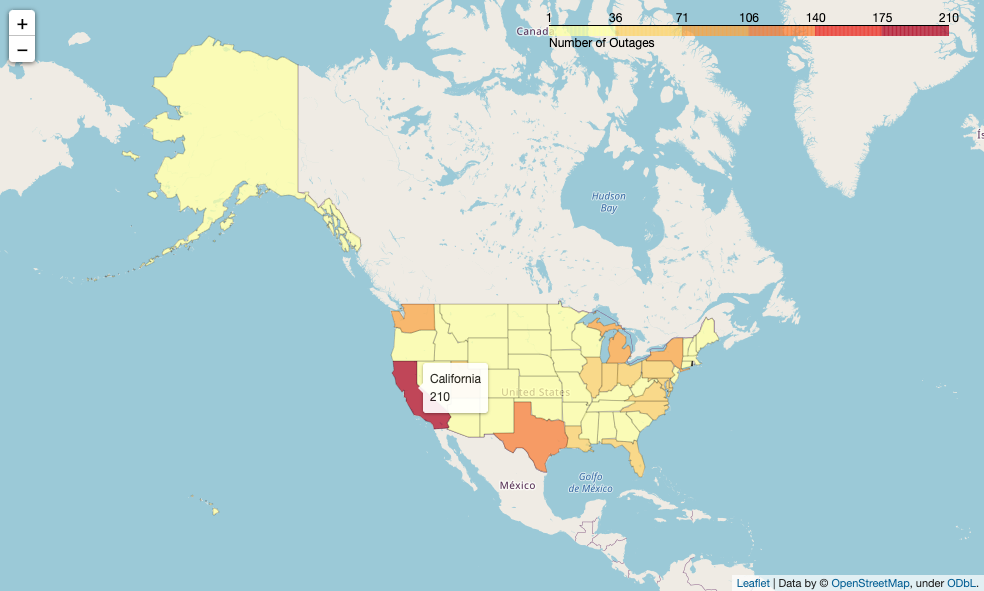

In [9]:
counts = sorted_table.groupby('POSTAL.CODE', as_index=False).count() #counts of how many times each state has had an outage

state_geo = os.path.join('data', 'us-states.json')
 
# initialize the map:
m = folium.Map(location=[50, -107],tiles="OpenStreetMap", zoom_start=3)
 
# add the color:
ch = folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    columns=['POSTAL.CODE', 'YEAR'],
    data=counts,
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name = 'Number of Outages',
).add_to(m)

style_function = 'font-size: 15px; font-weight:bold'
ch.geojson.add_child(folium.features.GeoJsonTooltip(['name', 'count'], labels=False))

m

#Folium map for a better geographic view of which states have the most power outages
#reference link: https://github.com/python-visualization/folium/tree/master/examples/data

#Comment out this portion if you're running on Jupyter Notebook
from IPython.display import Image
image = os.path.join('data', 'choroplethmap.png')
Image(filename= image)

This map was created in order to better visualize the bar graph above in terms of which states had a higher number of outages. On Github, the map doesn't convey the map correctly, therefore a screenshot of the map is shown. The map when ran on Python will depict the counts and state names when you hoover over a specific state. 

Plot 4: Pie Chart on the Distribution of Climate Regions

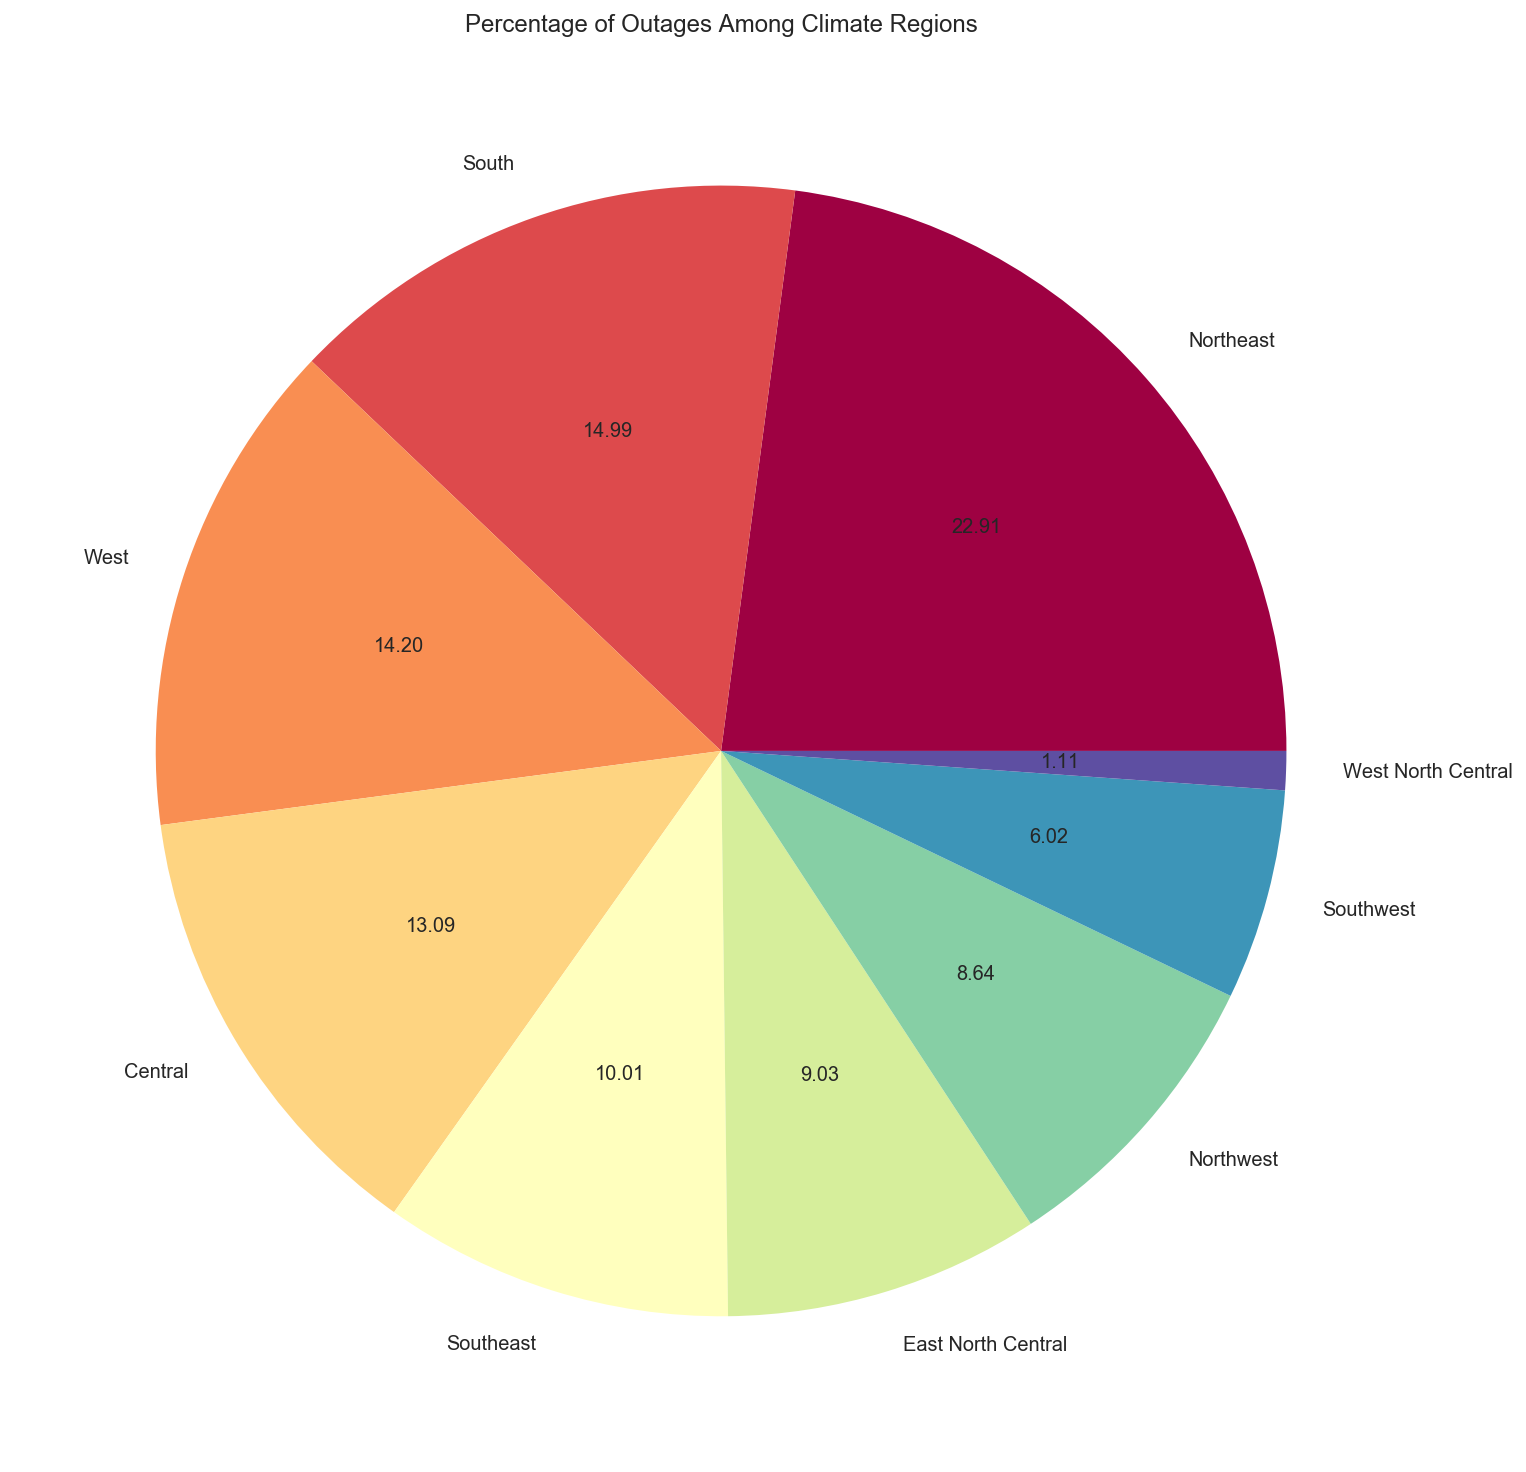

In [10]:
climate_regions_grouped = filtered_outages.groupby('CLIMATE.REGION').count()
climate_regions_grouped = climate_regions_grouped.sort_values('YEAR', ascending=False)

#plot climate regions
sizes = list(climate_regions_grouped['YEAR'])
labels = list(climate_regions_grouped.index)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 9)]

plt.figure(figsize=(13,13))
plt.pie(sizes, labels = labels, autopct = "%.2f", colors = colors)
plt.title('Percentage of Outages Among Climate Regions')
plt.show()

#reference link: https://towardsdatascience.com/data-science-with-python-intro-to-data-visualization-and-matplotlib-5f799b7c6d82

When generalizing the areas we found most outages occur in the northeast.

_Bivariate Analysis_

Plot 1: Line Graph for Causes Over Time

Text(0.5, 1.0, 'Causes Over Time')

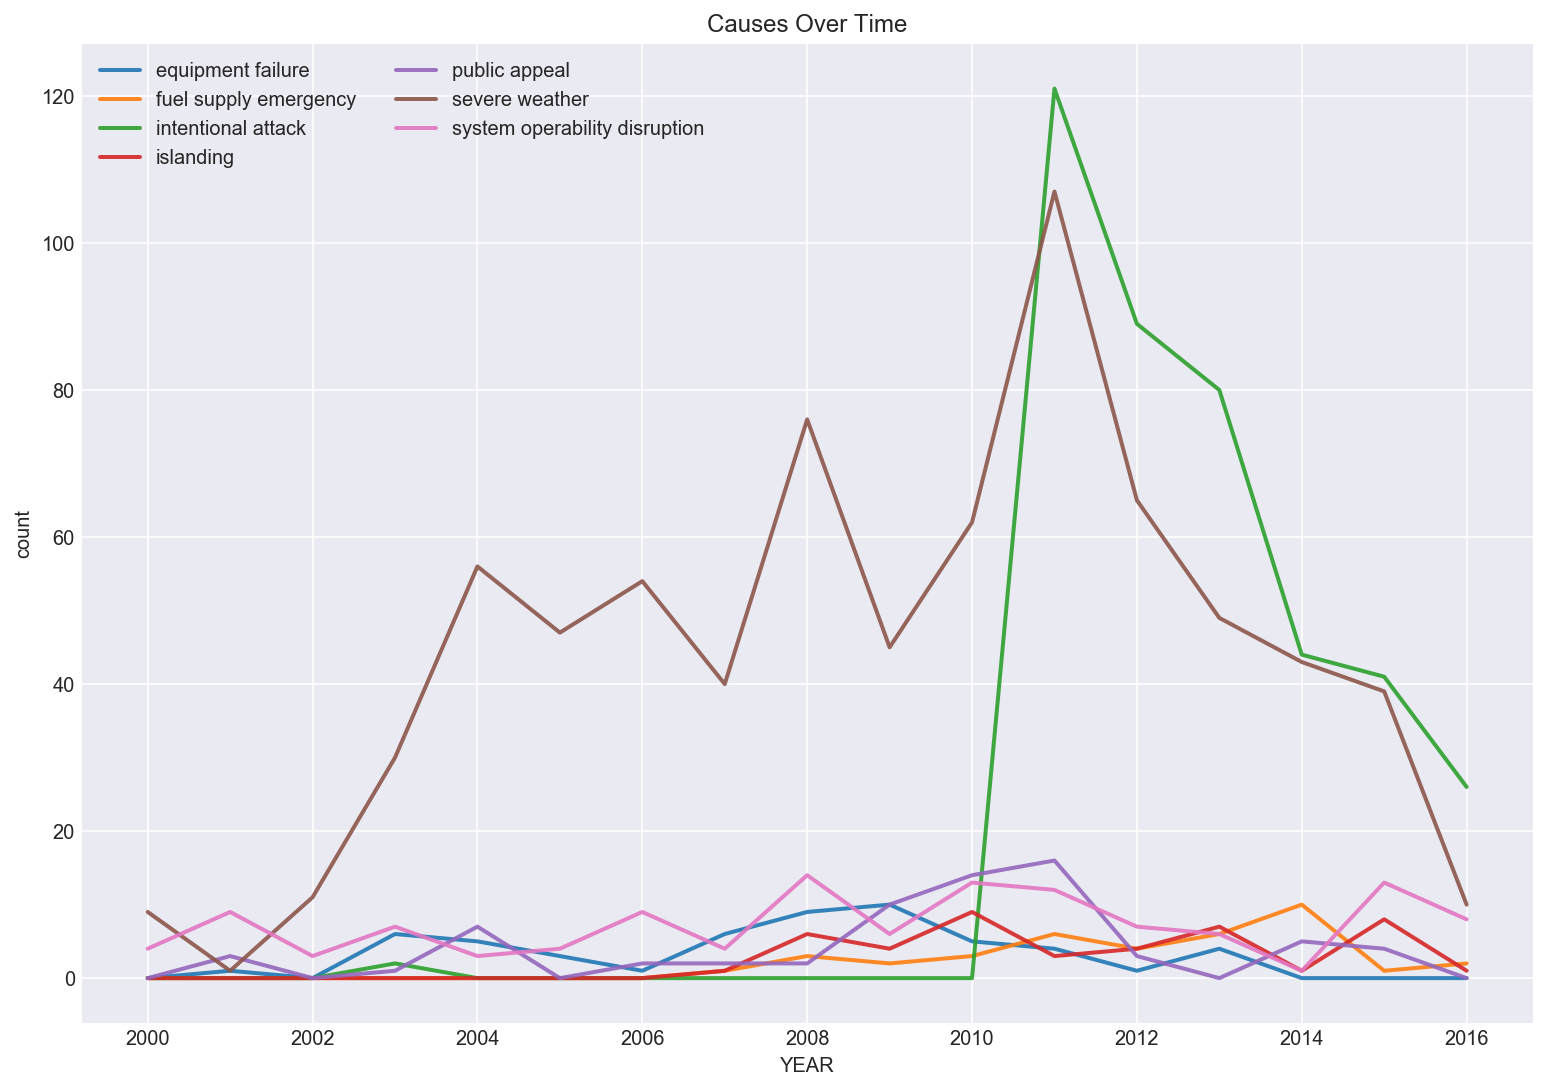

In [11]:
# Change of Causes over time
causes_dis_time = filtered_outages.pivot_table(index = 'YEAR', columns = 'CAUSE.CATEGORY', values = 'OUTAGE.DURATION', aggfunc = 'count', fill_value = 0)
causes_dis_time['YEAR'] = causes_dis_time.index

plt.figure(figsize=(13,9))
for column in causes_dis_time.columns[:-1]:
    plt.plot(causes_dis_time['YEAR'], causes_dis_time[column], marker='', linewidth=2, alpha=0.9, label=column)

plt.legend(loc = 2, ncol = 2) #add a legend for the lines
plt.xlabel('YEAR')
plt.ylabel('count')
plt.title('Causes Over Time')

Instead of focusing on overall outage causes, we wanted to see how they changed throughout the years. As year goes on, we see a large spike in intentional attacks in 2011. For more information, look at out Summary of Findings! In order to further investigate whether these causes affected different places, we checked to see whether or urban or rural places were affected more by each attack. 

Plot 2: Distribution of Power Outages Over Time

Text(0.5, 1.0, 'Number of Power Outages Per Year')

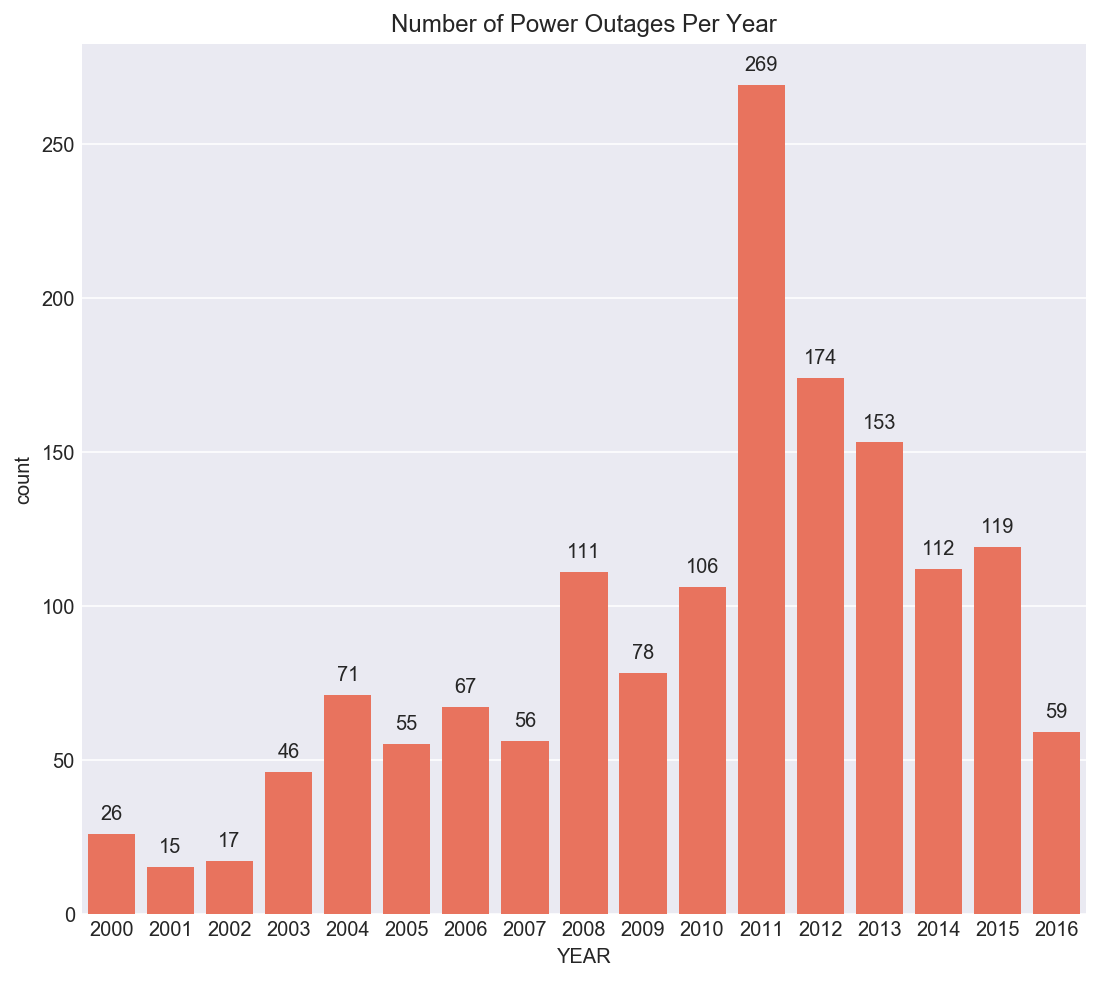

In [12]:
plt.figure(figsize=(9,8)) #make the size bigger so that x-axis is readable
years = sns.countplot(x='YEAR', data=filtered_outages, color="tomato") #set color to tomato so that they don't have a weird palette
for p in years.patches:
    years.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
years.set_title('Number of Power Outages Per Year')    
    
# Findings from plot: more power outages happen in recent years
# What happened in 2011 that caused so many power outtages?
# link: https://stackoverflow.com/questions/25447700/annotate-bars-with-values-on-pandas-bar-plots

This is a visualization for what year major power outages occur. This is a univariate analysis to go more in depth about the spaghetti plot above. This bar plot also reflects the spike in 2011.

In [13]:
#all of the intentional attacks in 2011 were due to vandalism 

intentional_attacks = filtered_outages[filtered_outages['CAUSE.CATEGORY'] == 'intentional attack']
intentional_attacks[intentional_attacks['YEAR'] == 2011]['CAUSE.CATEGORY.DETAIL'].unique()

array(['vandalism'], dtype=object)

After further investigation, it seems like all of the intentional attacks were due to vandalism as opposed to sabotage or suspicious activity.  

Plot 3: Distribution of Causes in Rural and Urbal Areas
- First Box Plot: Causes in Rural Areas
- Second Box Plot: Causes in Urban Areas

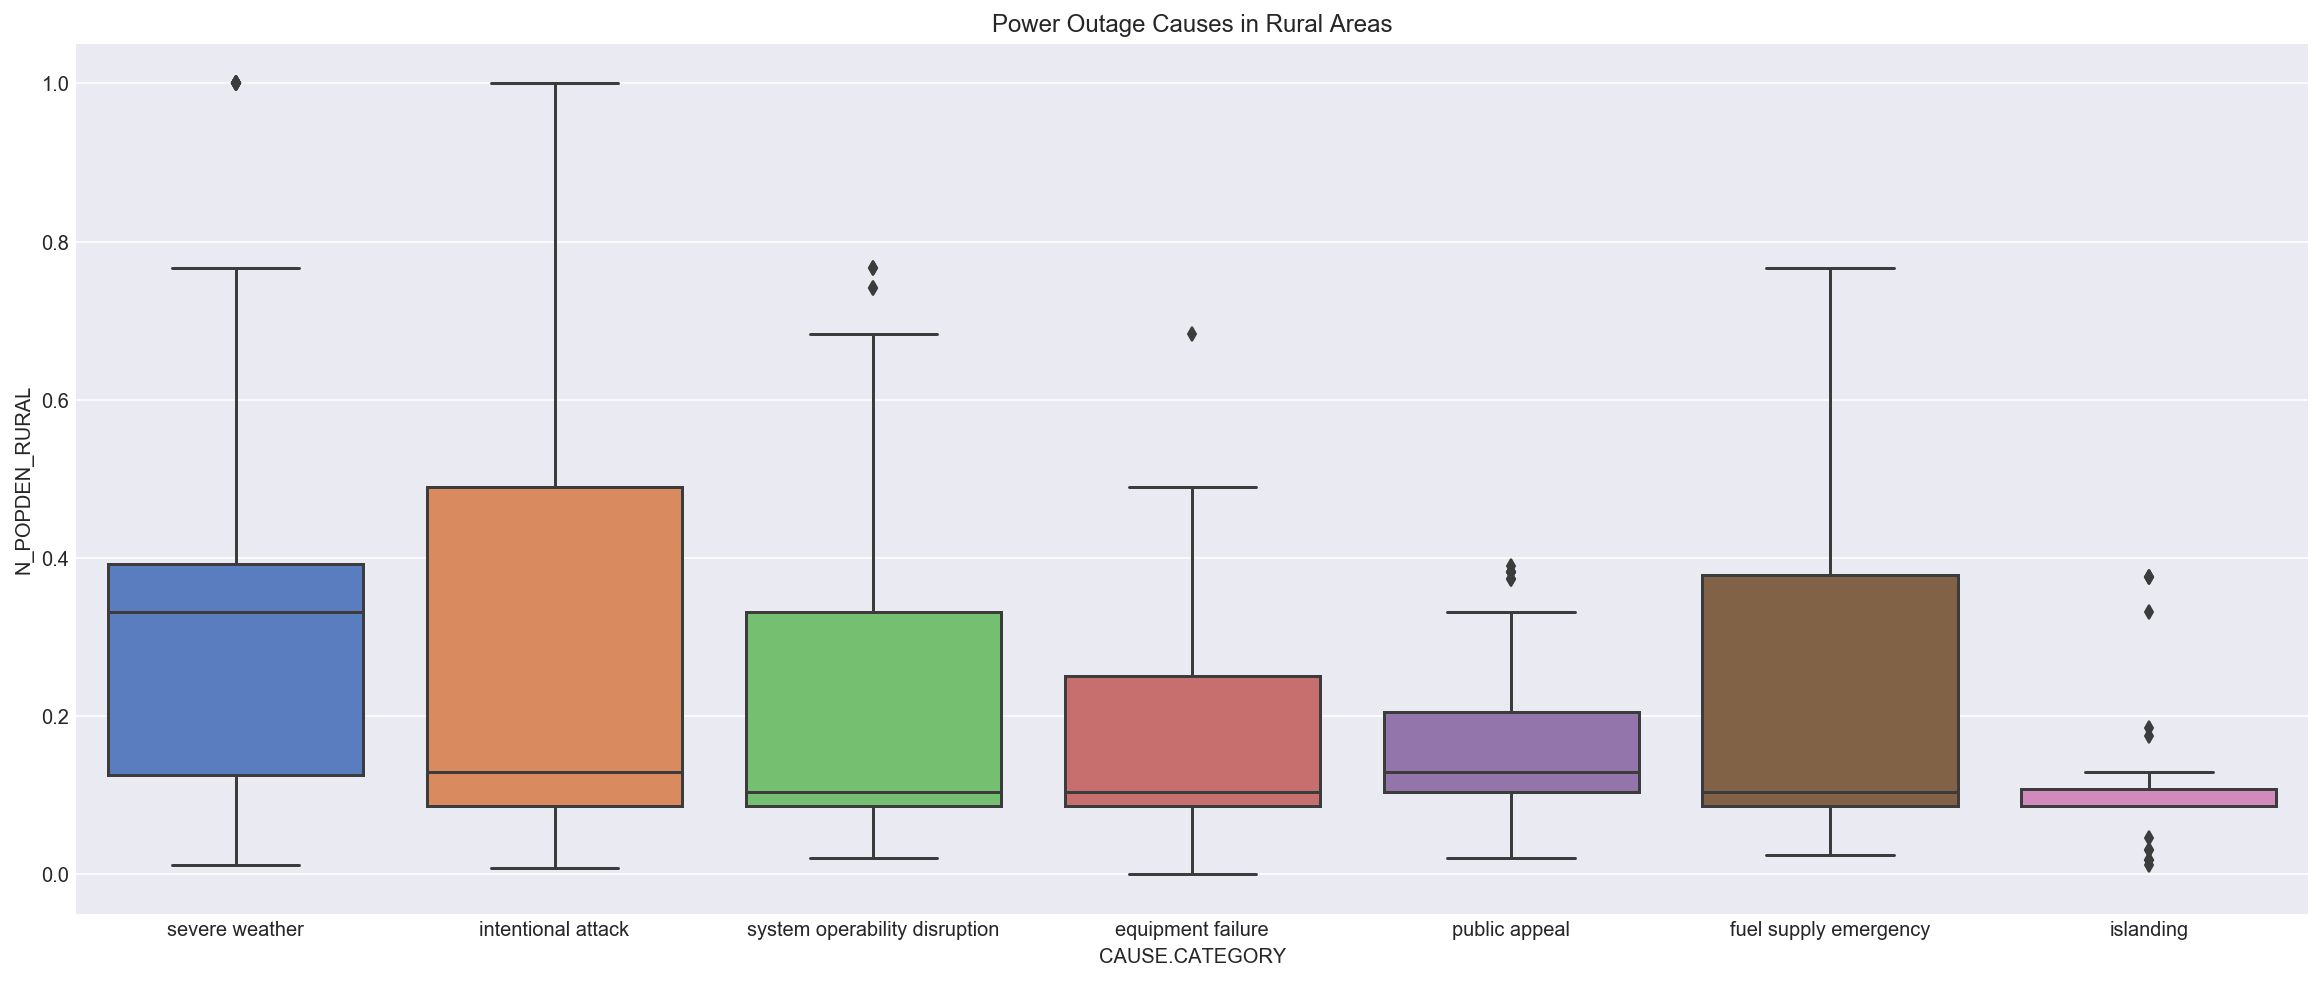

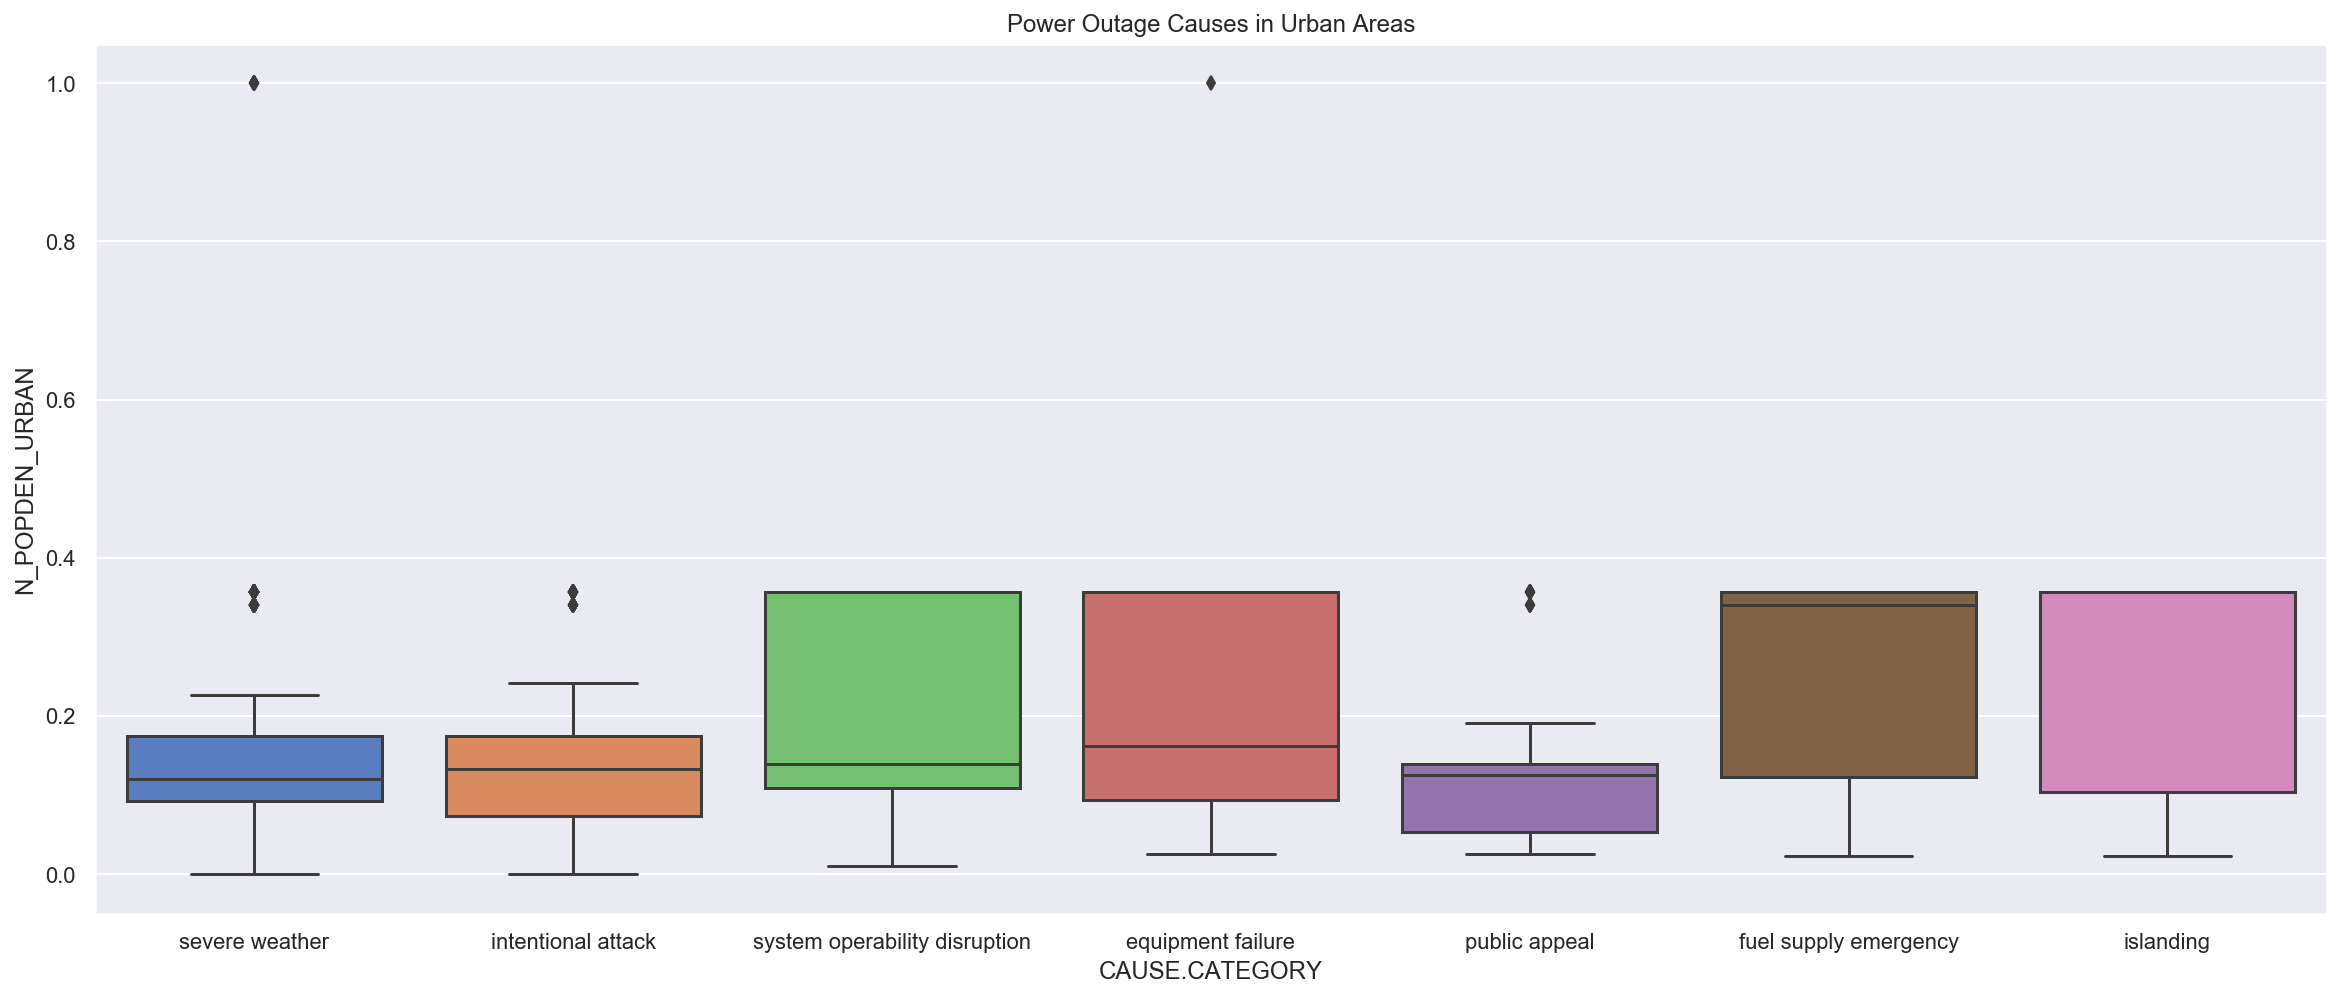

In [14]:
#normalize the urban and rural population densities in order to properly compare the two values
normalized = filtered_outages.copy()
normalized['N_POPDEN_URBAN'] = (filtered_outages['POPDEN_URBAN']-min(filtered_outages['POPDEN_URBAN']))/(max(filtered_outages['POPDEN_URBAN']) - min(filtered_outages['POPDEN_URBAN']))
normalized['N_POPDEN_RURAL'] = (filtered_outages['POPDEN_RURAL']-min(filtered_outages['POPDEN_RURAL']))/(max(filtered_outages['POPDEN_RURAL']) - min(filtered_outages['POPDEN_RURAL']))

#  Causes in Rural Areas

plt.figure(figsize=(20,8))
intentional_affect = sns.boxplot(data=normalized, x='CAUSE.CATEGORY', y='N_POPDEN_RURAL', palette=sns.color_palette("muted"))
intentional_affect.set_title('Power Outage Causes in Rural Areas')
sns.set(font_scale=1)
plt.show()

# intentional attack effect
# distribution of each type of intentional attack depending on the state's population density of urban areas
# graph results: suspicious activity seems to be the domainant intentional cause in places with higher urban population density

# Causes in urban areas 

plt.figure(figsize=(20,8))
intentional_affect = sns.boxplot(data=normalized, x='CAUSE.CATEGORY', y='N_POPDEN_URBAN', palette=sns.color_palette("muted"))
intentional_affect.set_title('Power Outage Causes in Urban Areas')
sns.set(font_scale=1)
plt.show()

In order to get a better idea of which causes of outages that urban vs rural areas were more susceptible to, we created these box plots. As you can see in the top box plot, rural areas are more susceptible to severe weather outages than urban areas. 

_Aggregations_

Plot 1: Distribution of Number of Customers Affected by Specific Cause Category Detail 

Text(0, 0.5, 'Cause Category Detail')

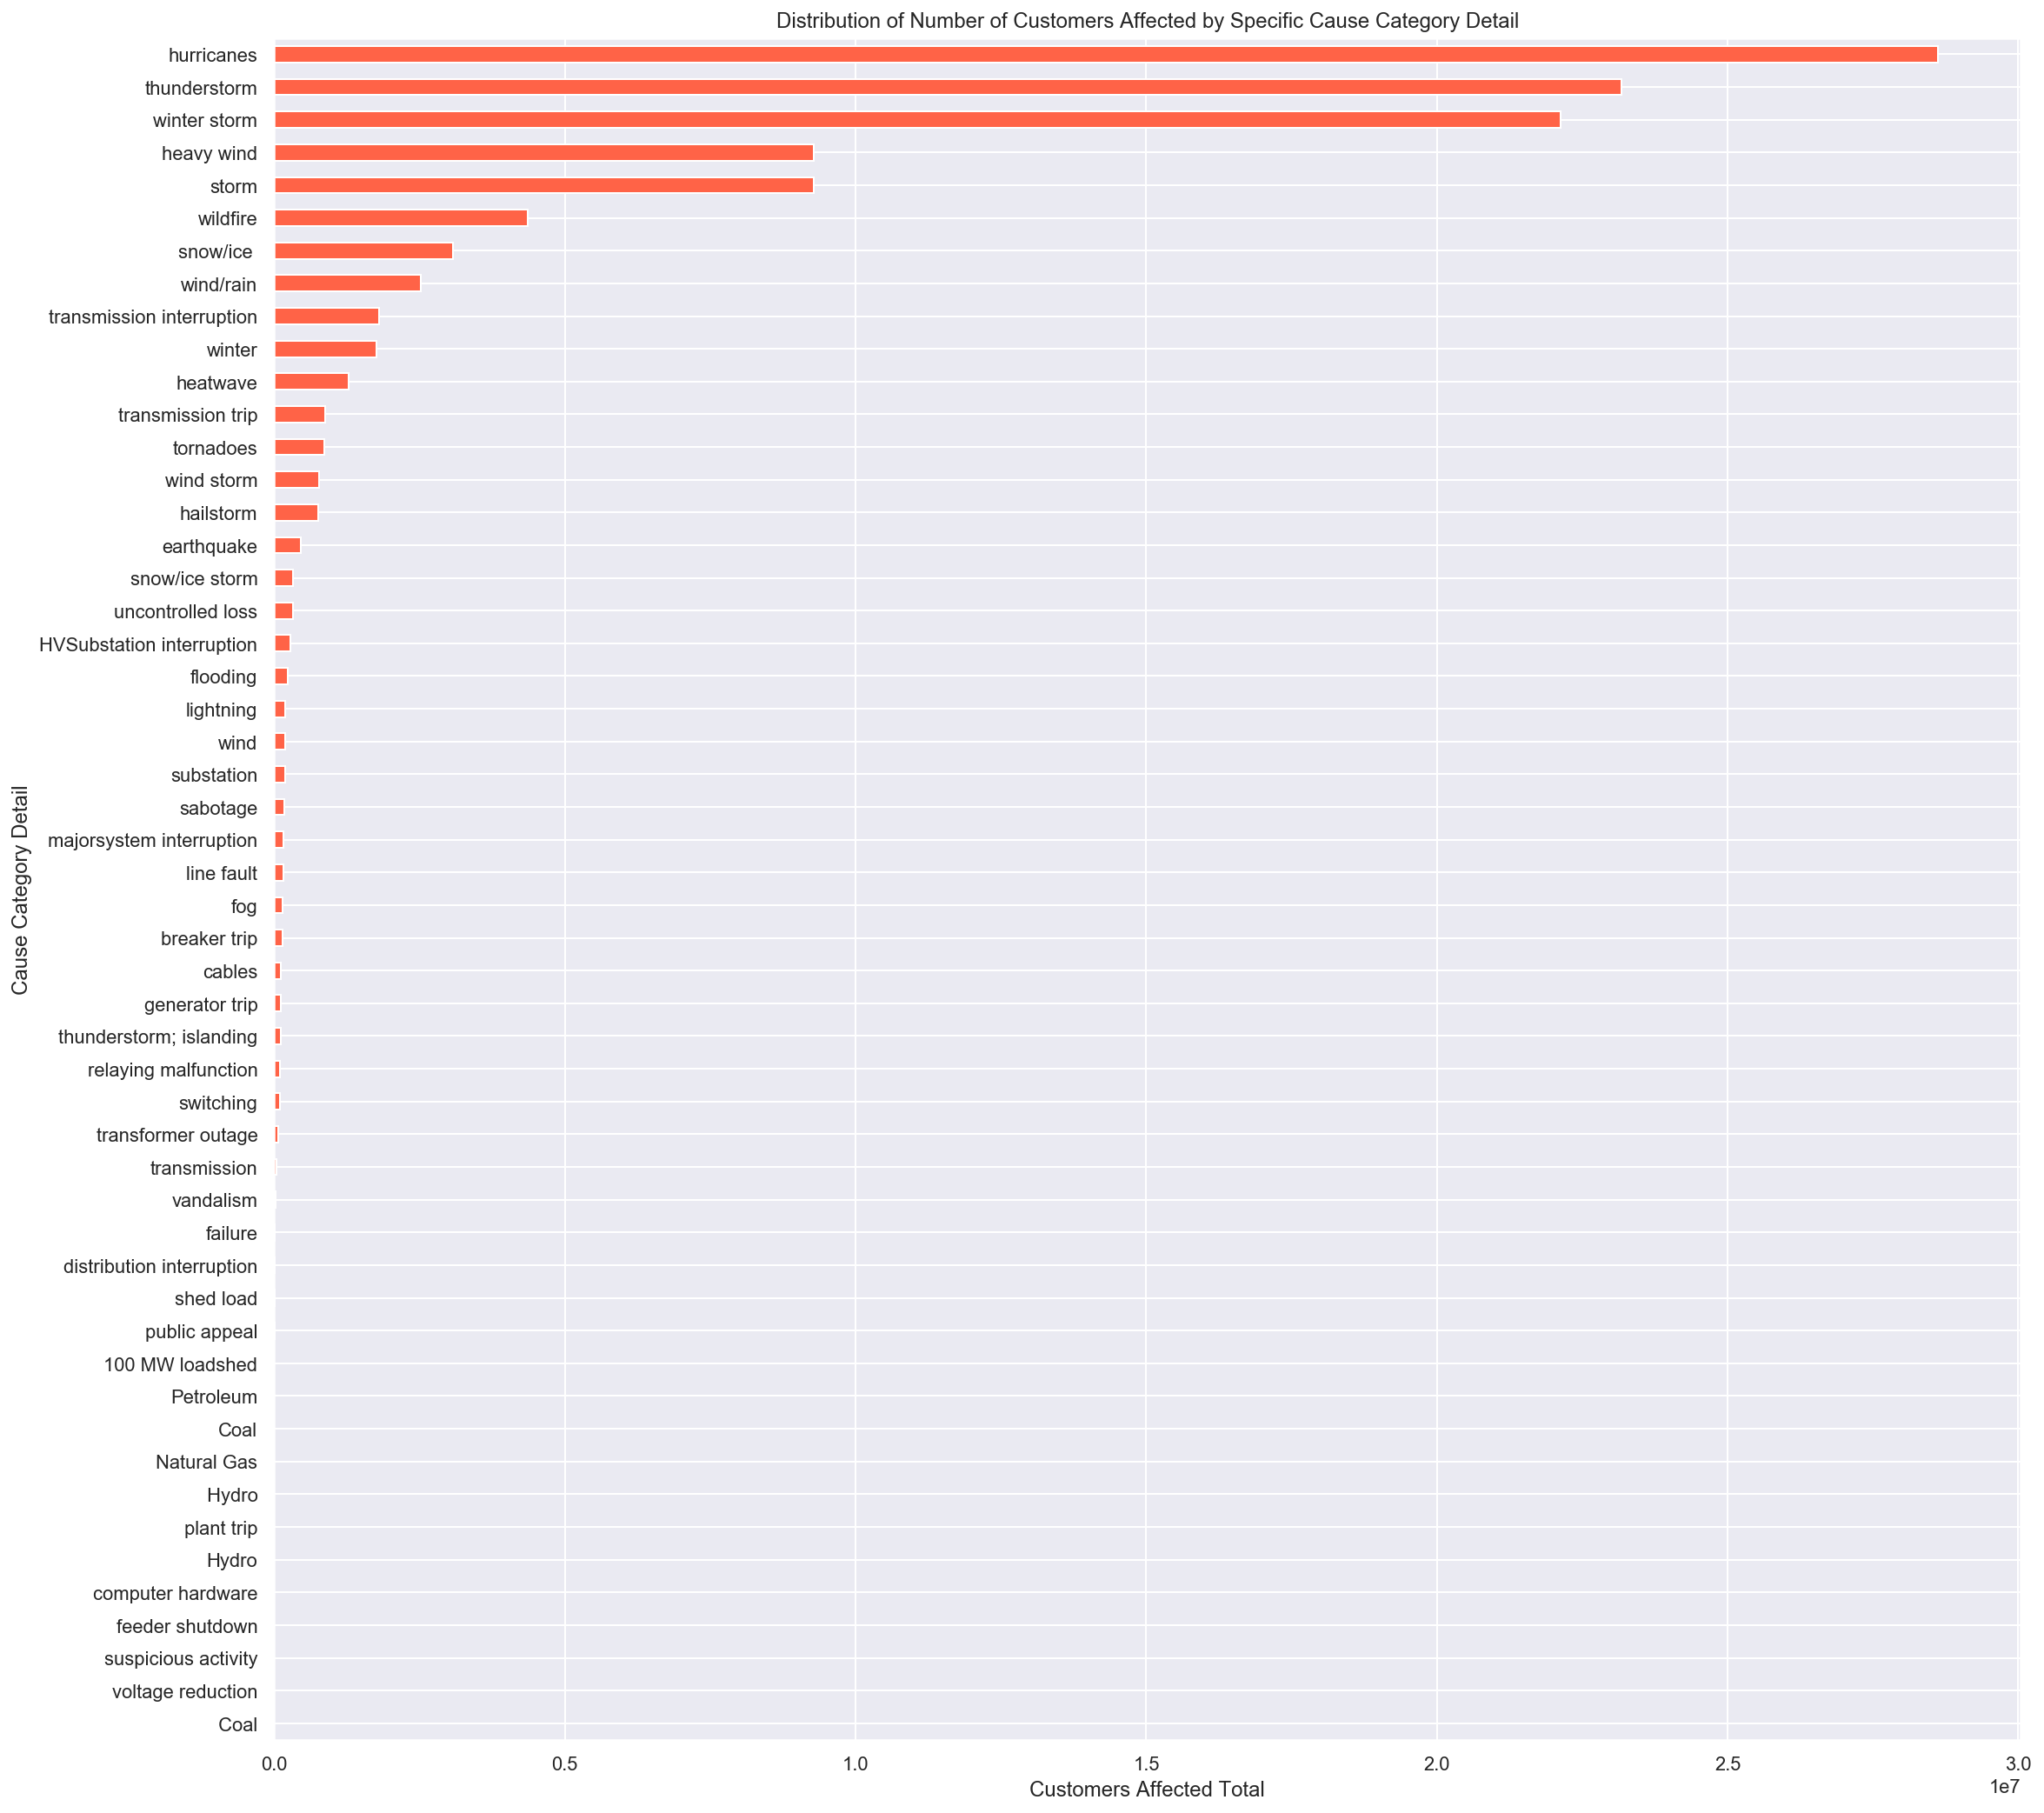

In [15]:
customers = filtered_outages.groupby('CAUSE.CATEGORY.DETAIL').sum()[['CUSTOMERS.AFFECTED']]
plt.figure(figsize=(18,18))
customers.sort_values('CUSTOMERS.AFFECTED')['CUSTOMERS.AFFECTED'].plot(kind = 'barh', color="tomato")
plt.title('Distribution of Number of Customers Affected by Specific Cause Category Detail')
plt.xlabel('Customers Affected Total')
plt.ylabel('Cause Category Detail')

This graph shows that most people were affected by severe weather so we went on to explore the hypothesis question: Are rural areas more prone to severe weather outages than urban areas?

_Other fun visualizations that don't relate to the hypothesis testing:_ (the next few graphs are graphs we made in the process of finding a hypothesis test, but ended up not using them)

Plot 1: Scatter Plot of the Counts of Start Times of an Outage

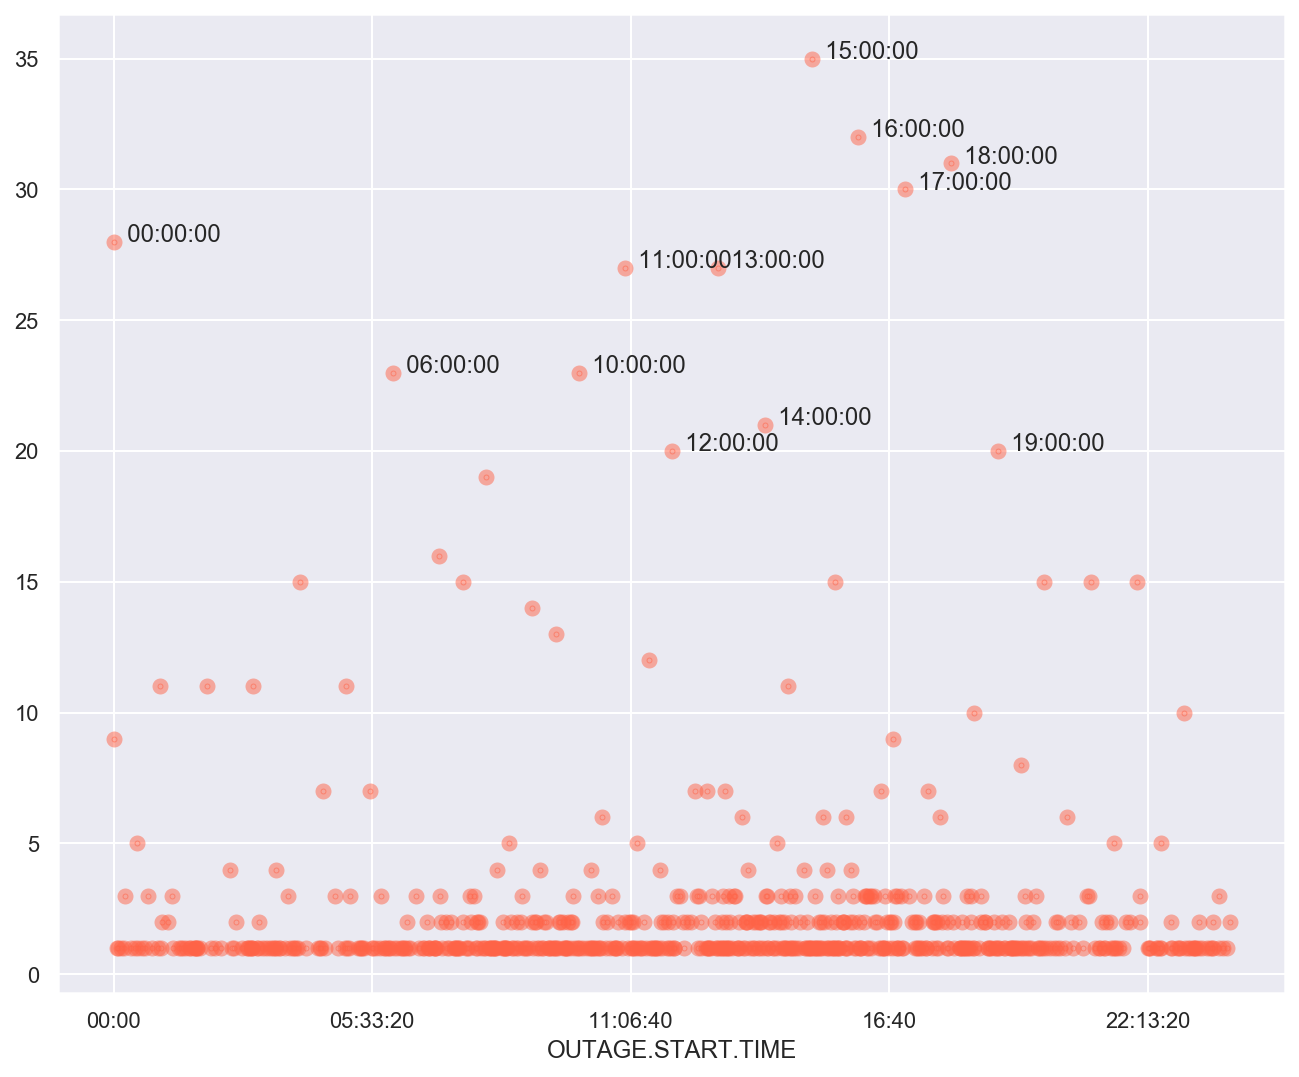

In [16]:
start_time_index = filtered_outages.groupby('OUTAGE.START.TIME').count() #get the counts of times that outages started

#get the points we want to annotate
annotations = start_time_index[start_time_index['YEAR'] > 19]

y = list(annotations['YEAR'])
z = list(annotations.index)

axes = start_time_index['YEAR'].plot(marker='.', markeredgewidth = 5, alpha=0.5, linestyle='None', figsize=(11, 9), color='tomato')

for i, txt in enumerate(z):
    axes.annotate('  ' + str(txt), (z[i], y[i]))
    
#link: https://stackoverflow.com/questions/14432557/matplotlib-scatter-plot-with-different-text-at-each-data-point
#the most outages occur at an even hour (users might put even times as estimates)

Plot 2: Interactive map that shows how the amount of outages changed throughout the years 

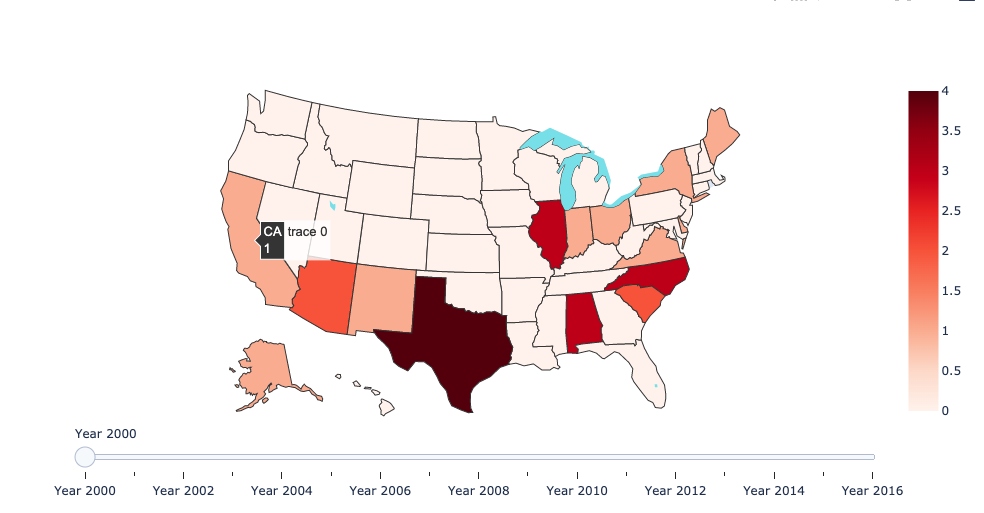

In [17]:
where_when = filtered_outages.pivot_table(index = 'POSTAL.CODE', columns = 'YEAR', values = 'U.S._STATE', aggfunc = 'count', fill_value = 0)   
where_when = where_when.reset_index()
where_when.columns.name = None

#for the interactive slider map
import plotly
import plotly.graph_objs as go
import plotly.offline as offline
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

#with the year and slider
data_slider = []

#### Populate the data object
for year in where_when.columns[1:]:

    # Select the year (and remove DC for now)
    df_sected_crime = where_when[['POSTAL.CODE', year]]

    ### create the dictionary with the data for the current year
    data_one_year = dict(
                        type='choropleth',
                        locations = df_sected_crime['POSTAL.CODE'],
                        z=df_sected_crime[year].astype(float),
                        locationmode='USA-states',
                        colorscale = 'reds',
                        )

    data_slider.append(data_one_year)  # Add the dictionary to the list of dictionaries for the slider
    
steps = []

for i in range(len(data_slider)):
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(i + 2000)) # label to be displayed for each step (year)
    step['args'][1][i] = True
    steps.append(step)

## Create the 'sliders' object from the 'steps' 
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

# I set up the layout (including slider option)
layout = dict(geo=dict(scope='usa',
                       projection={'type': 'albers usa'},
                      showlakes = True,  # if you want to give color to the lakes
                       lakecolor = 'rgb(133, 228, 237)'),
              sliders=sliders)


# I create the figure object:
fig = dict(data=data_slider, layout=layout) 

# to plot in the notebook
#Uncomment this portion if you're running on a Jupyter Notebook
# plotly.offline.iplot(fig)

# #Comment out this portion if you're running on Jupyter Notebook
from IPython.display import Image
image = os.path.join('data', 'newplot.png')
Image(filename= image)

Plot 3: Correlation Matrix 
- You can see many interesting correlations with this correlation matrix for future analysis

Text(156.5, 0.5, 'column names')

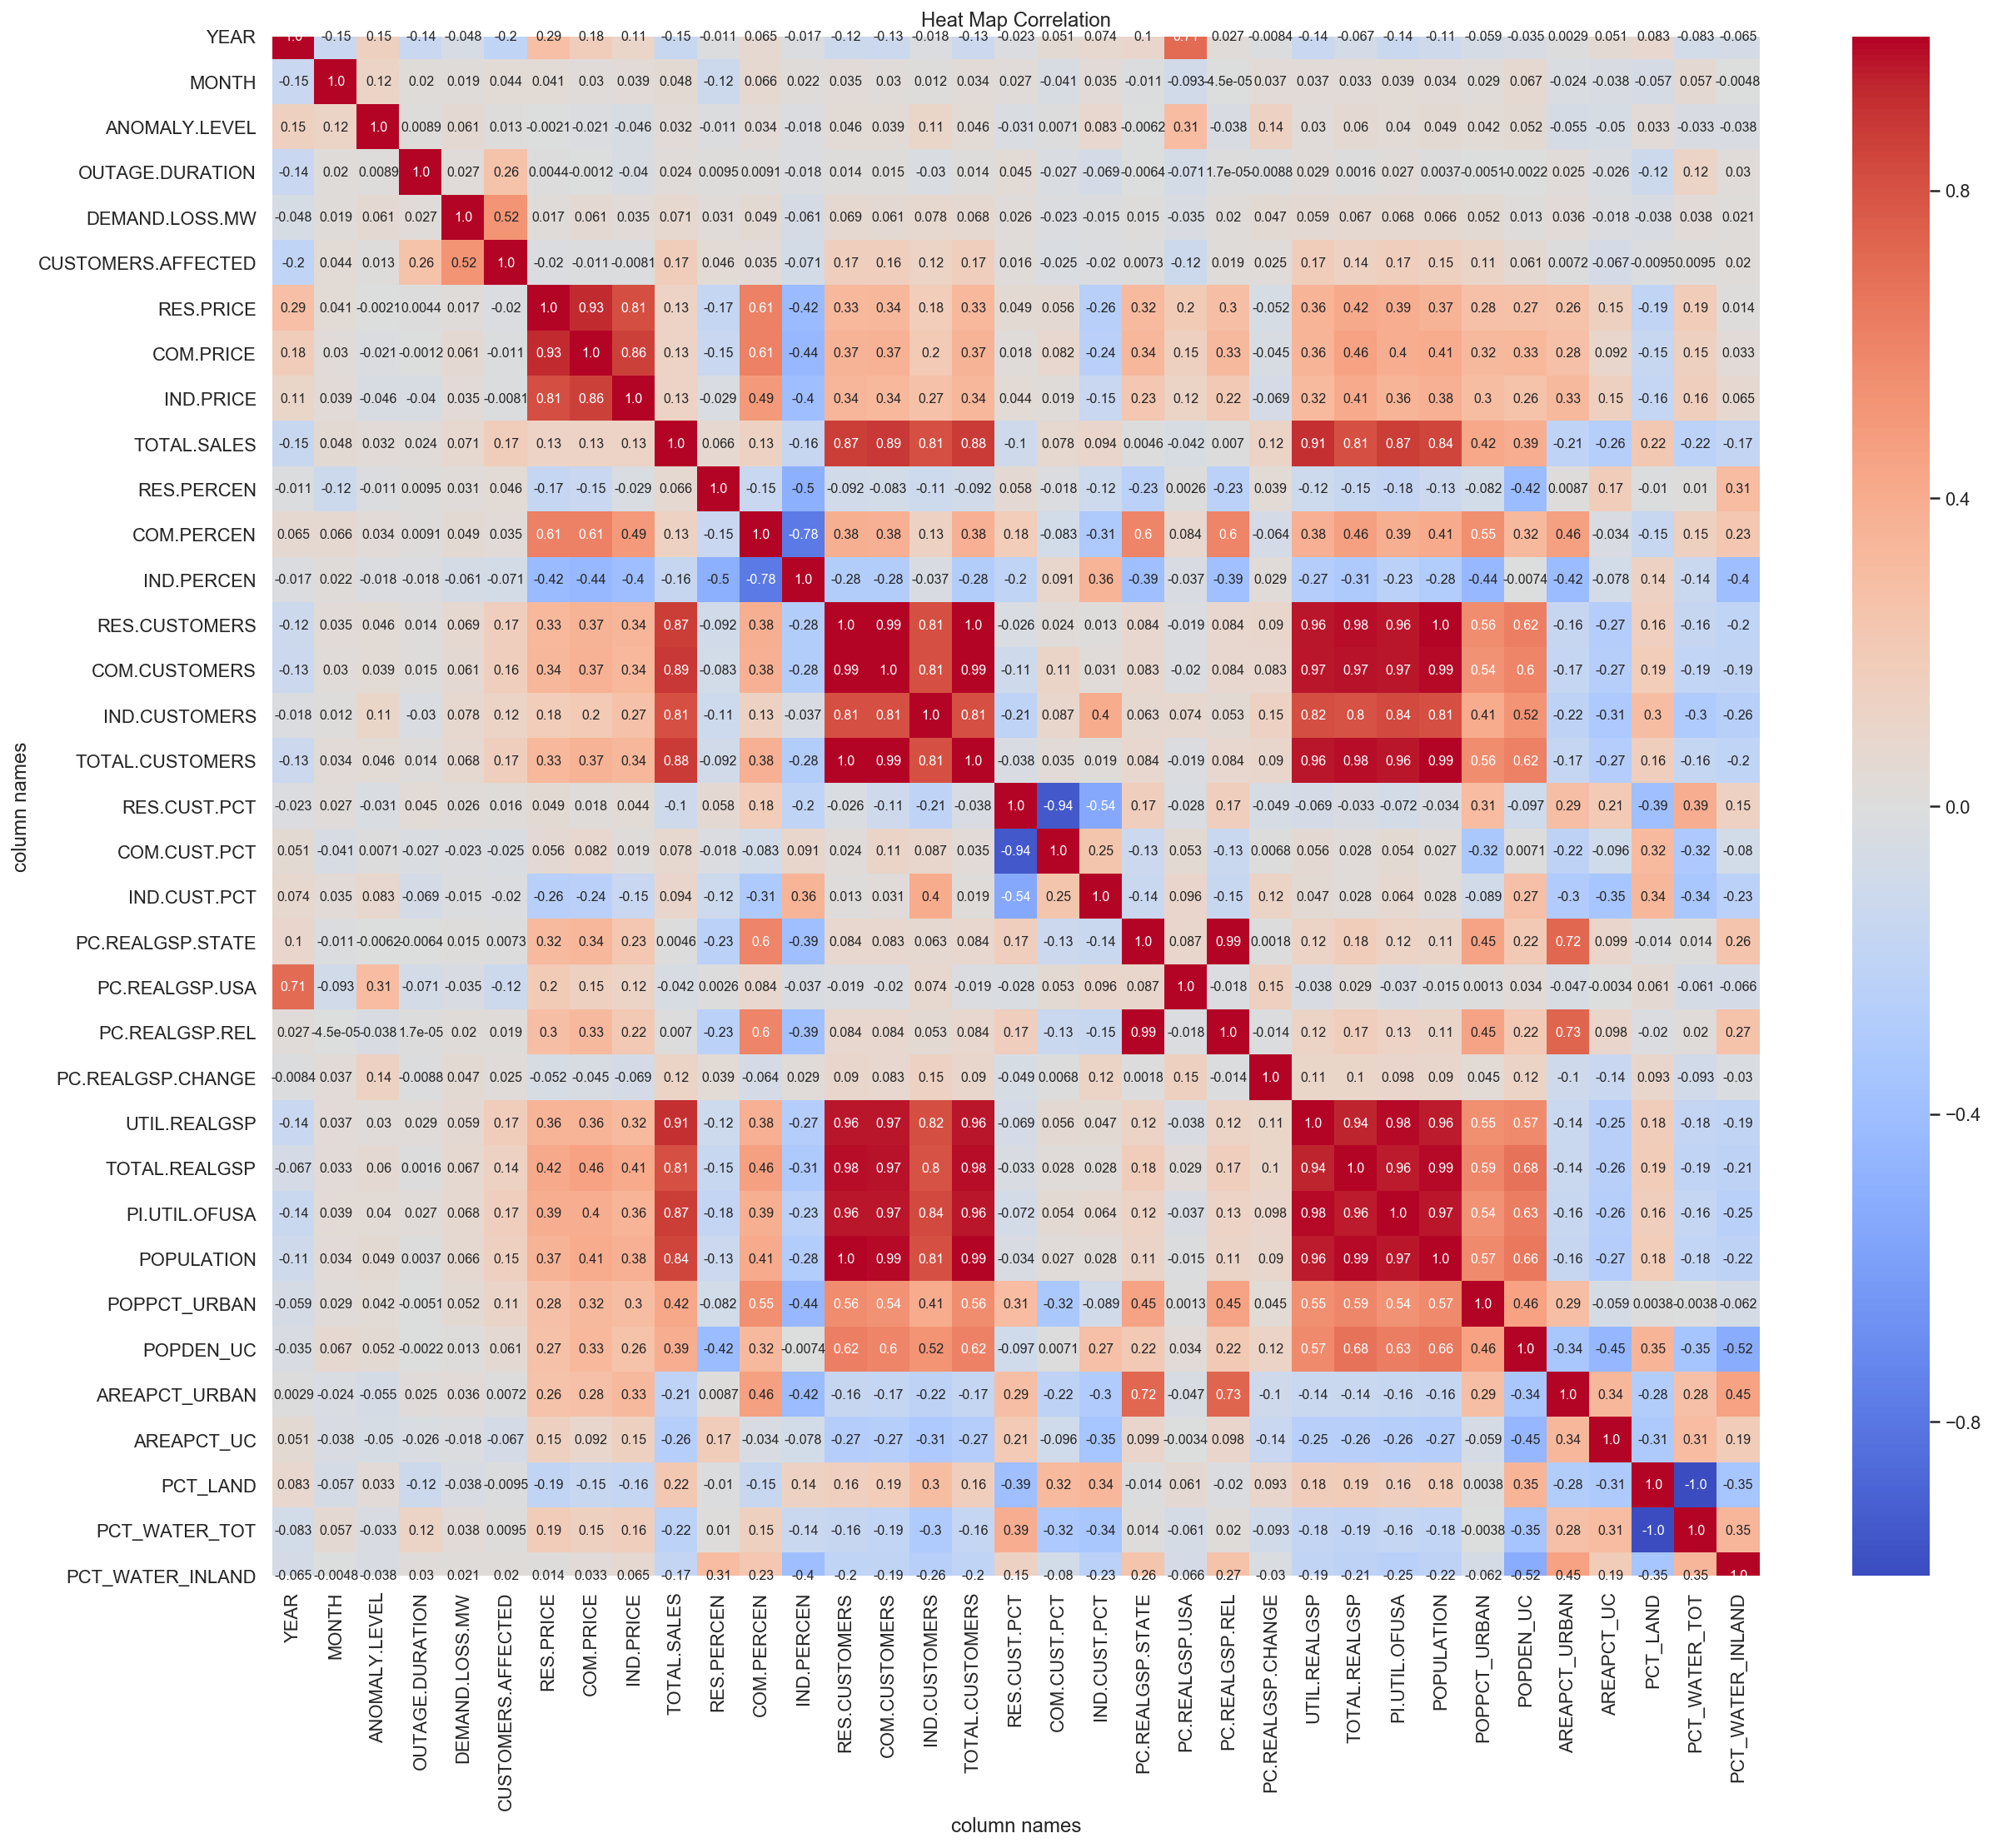

In [18]:
plt.subplots(figsize=(20,17))
sns.heatmap(filtered_outages.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 8}, fmt=".2")

plt.title('Heat Map Correlation')
plt.xlabel('column names')
plt.ylabel('column names')

#this plot changes on jupyter notebook, might look weird on pdf
#can adjust scale on jupyter notebook not on pdf
#Reference link: https://amaral.northwestern.edu/blog/step-step-how-plot-map-slider-represent-time-evolu

Plot 4: Median Number of Customers Affected per Year in Different NERC Regions

Text(0.5, 0, 'Median Number of Customers Affected')

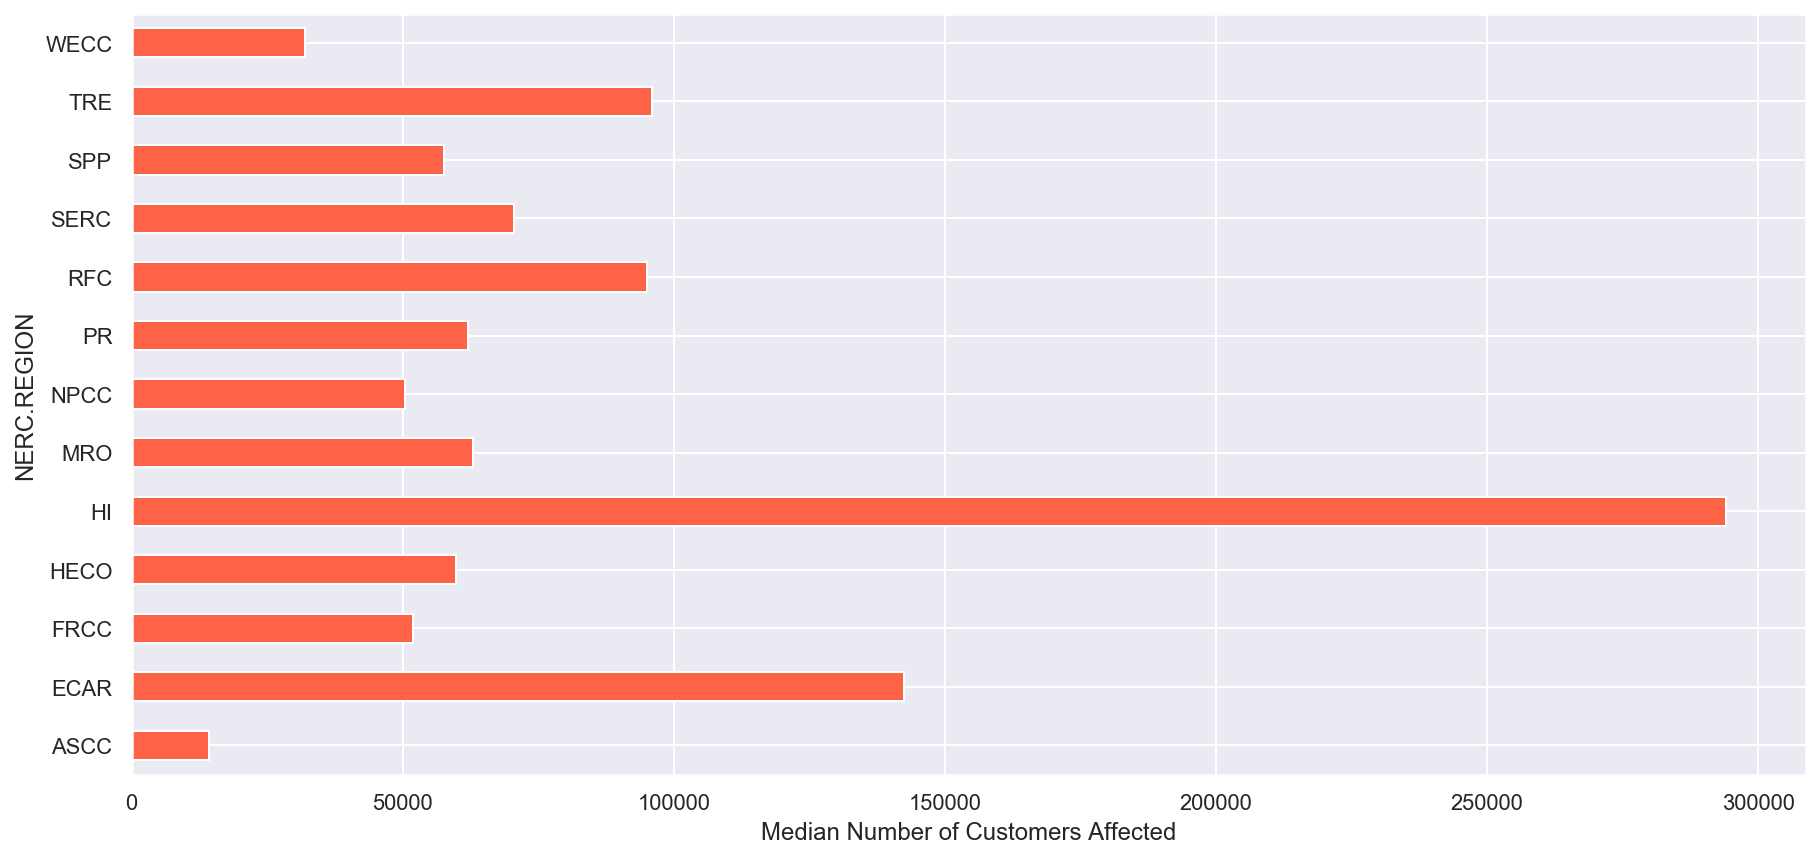

In [19]:
#used median to account for any outliers 
plt.figure(figsize=(15,7))
filtered_outages.groupby('NERC.REGION').median()['CUSTOMERS.AFFECTED'].drop('FRCC, SERC').plot(kind = 'barh', color="tomato")
plt.xlabel('Median Number of Customers Affected')

### Assessment of Missingness

Imports to run KS test:

In [20]:
from scipy.stats import ks_2samp

Permutations Test for KS statistics

In [21]:
def perm4missing(filtered_outages, col):
    filtered = filtered_outages.assign(_null=filtered_outages['OUTAGE.DURATION'].isnull())
    no_null = filtered.loc[filtered['_null'] == False , col]
    is_null = filtered.loc[filtered['_null'] == True, col]
    obs = ks_2samp(no_null, is_null).statistic
    n_repetitions = 500

    ks_list = []
    for _ in range(n_repetitions):
    
        # shuffle the gender column
        shuffled_col = (filtered[col].sample(replace=False, frac=1).reset_index(drop=True))
    
        # put them in a table
        shuffled = (filtered.assign(**{'Shuffled': shuffled_col,}))
    
        # compute the KS
        grps = shuffled.groupby('_null')['Shuffled']
        ks = ks_2samp(grps.get_group(True), grps.get_group(False)).statistic
    
        ks_list.append(ks)
    
    ks_list = np.array(ks_list)

    pval = np.count_nonzero(ks_list > obs)/len(ks_list)
    
    #VISUALIZATION
    pd.Series(ks_list).plot(kind='hist', density=True, alpha=0.8, title='p-value: %f' % pval)

    plt.scatter(obs, 0, color='red', s=40);
    
    return pval

Dependent Column - Reject

Text(0.5, 0, 'KS statistic distribution')

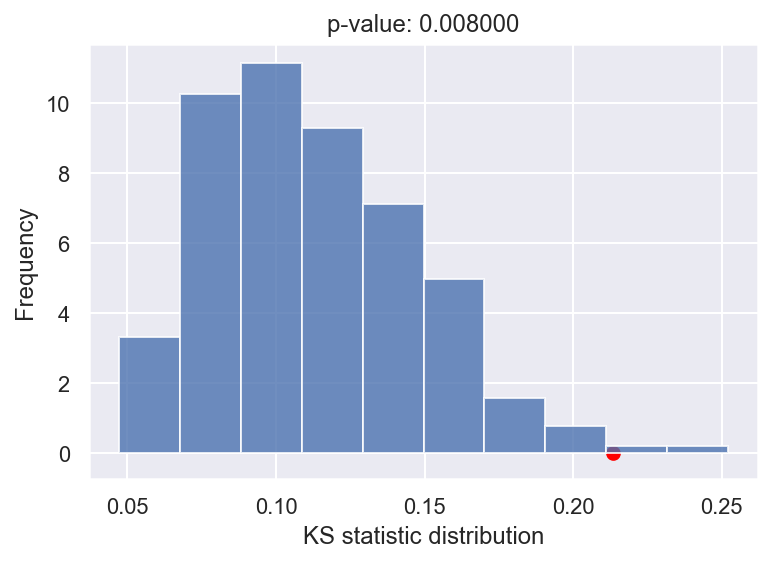

In [22]:
perm4missing(filtered_outages, 'TOTAL.SALES')
plt.xlabel('KS statistic distribution')

In [70]:
dependent_ks = filtered_outages.copy()
dependent_ks['DURATION.NULL'] = dependent_ks['OUTAGE.DURATION'].isna()
dependent_ks['DURATION.NULL'] = dependent_ks['DURATION.NULL'].apply(lambda x: 1 if x==True else 0)

In [71]:
dependent_ks = dependent_ks.loc[:, ['TOTAL.SALES','DURATION.NULL']]
dependent_ks = dependent_ks.dropna()
dependent_ks.head(5)

TOTAL.SALES  DURATION.NULL
OBS                            
1      6562520.0              0
2      5284231.0              0
3      5222116.0              0
4      5787064.0              0
5      5970339.0              0

In [72]:
dependent_ks['TOTAL.SALES'] = pd.qcut(dependent_ks['TOTAL.SALES'], 4)

In [73]:
dependent_ks = dependent_ks.groupby(['TOTAL.SALES']).sum()

DURATION.NULL
TOTAL.SALES                            
(409203.999, 5492474.5]               9
(5492474.5, 8987191.0]               18
(8987191.0, 15636182.0]               5
(15636182.0, 41667168.0]             16

Visualization: Distribution of Outage Duration Null Values Within Total Sales

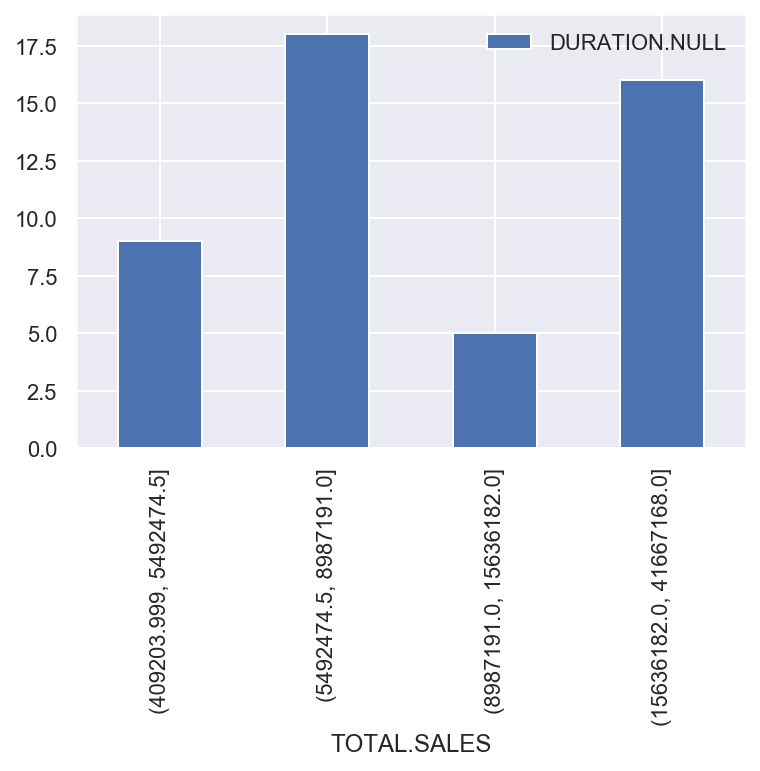

In [76]:
dependent_ks.plot.bar()

Not Dependent Column - Fail to reject

Text(0.5, 0, 'KS statistic distribution')

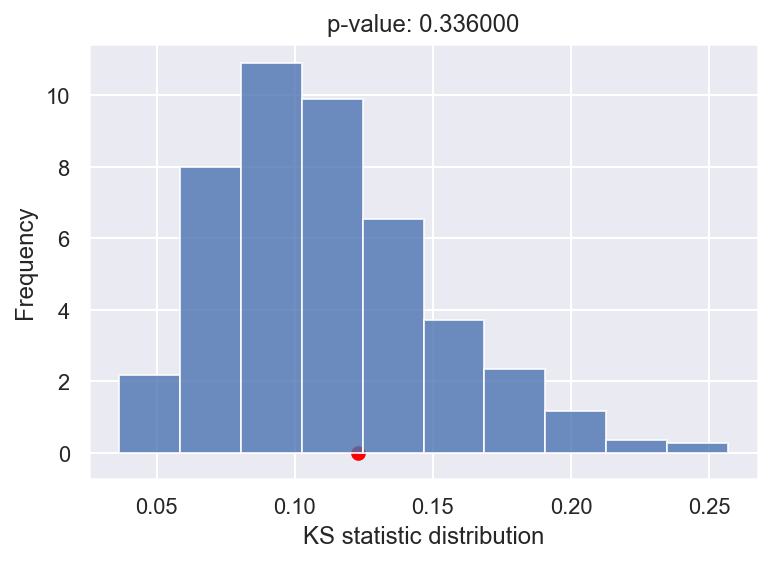

In [163]:
perm4missing(filtered_outages, 'CUSTOMERS.AFFECTED')
plt.xlabel('KS statistic distribution')

### Hypothesis Test: Are rural areas more prone to severe weather outages than urban areas?

- Null: There is no difference in the amount that severe weather causes outages in rural vs urban populations
- Alternative: There is a statistically significant difference in the amount that severe weather causes outages in rural vs urban populations

Test statistic: the difference in median outages caused by severe weather betweens urban and rural populations

In [164]:
severe_weather = normalized[normalized['CAUSE.CATEGORY'] == 'severe weather']

urban_median = (severe_weather['N_POPDEN_URBAN']).median()
rural_median = (severe_weather['N_POPDEN_RURAL']).median()
observed_stat = rural_median-urban_median
observed_stat

0.21218688012592568

Text(0.5, 0, 'Difference in Medians')

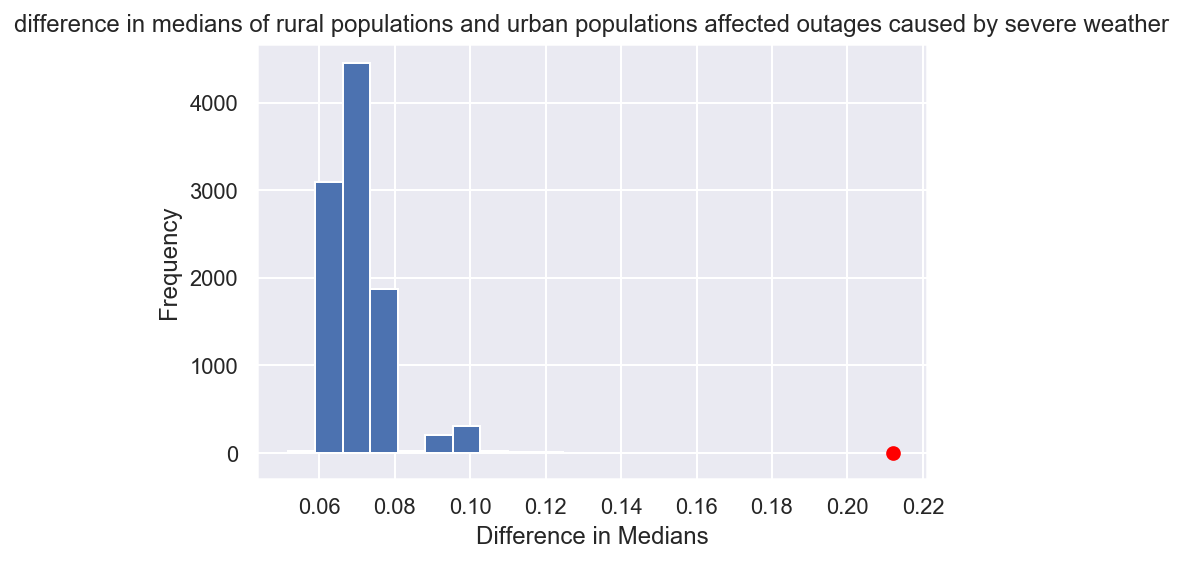

In [165]:
size = 763 # size of severe_weather 

N_trials =  10000
median = []

for i in np.arange(N_trials):
    random_sample = normalized.sample(int(size), replace=False)
    new_urban_median = (random_sample['N_POPDEN_URBAN']).median()
    new_rural_median = (random_sample['N_POPDEN_RURAL']).median()
    median.append((new_rural_median-new_urban_median))
    
median = np.array(median)

pd.Series(median, name='Difference in Medians').plot(
    kind='hist', 
    bins=10,
    title='difference in medians of rural populations and urban populations affected outages caused by severe weather'
)
plt.scatter(observed_stat, 0, color='red', s=40);
plt.xlabel('Difference in Medians')

In [166]:
# p-value
np.count_nonzero(median >= observed_stat) / N_trials

0.0

## SECOND HALF: Prediction Model: Prediction of The Cause of Outages

### Baseline Model

Included the existing columns that are most relevant to predict the CAUSE.CATEGORY

In [167]:
baseline_outages = filtered_outages.loc[:,['YEAR', 'POSTAL.CODE', 'CUSTOMERS.AFFECTED', 'POPPCT_URBAN']]
baseline_outages.head(2)

YEAR POSTAL.CODE  CUSTOMERS.AFFECTED  POPPCT_URBAN
OBS                                                    
1    2011          MN             70000.0         73.27
2    2014          MN                 NaN         73.27

Sets Y (Predition Value) = 'CAUSE.CATEGORY' data

In [168]:
y = filtered_outages['CAUSE.CATEGORY']
X = baseline_outages

Separate columns into categorical and numerical columns

In [169]:
catcols = baseline_outages.drop(baseline_outages.select_dtypes(exclude = 'object'), axis = 1).columns
numcols = baseline_outages.drop(baseline_outages.select_dtypes(exclude = 'number'), axis = 1).columns

print(catcols)
print(numcols)

Index(['POSTAL.CODE'], dtype='object')
Index(['YEAR', 'CUSTOMERS.AFFECTED', 'POPPCT_URBAN'], dtype='object')


###### Baseline Model Pipeline 
    - Categorical features: 
       - Missing values were imputed as string null
       - One hot encoded all categorical variables
    - Quantitative features
       - Missing values were imputed as 0

In [170]:
cats = Pipeline([
    ('imp', SimpleImputer(strategy = 'constant', fill_value = 'NULL')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse = False)),
])

ct = ColumnTransformer([
    ('catcols', cats, catcols),
    ('numcols', SimpleImputer(strategy = 'constant', fill_value = 0), numcols)
])

clf = DecisionTreeClassifier()

pl = Pipeline([('feats', ct), ('classify', clf)])

Split Test and Train Data

In [171]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size = 0.3)

In [172]:
pl.fit(X_tr, y_tr)
pl.score(X_ts, y_ts)

0.7266811279826464

##### Evaluation Metric of Baseline Model:

In [173]:
scores = dict()
scores['test_accuracy'] = (accuracy_score(y_ts, pl.predict(X_ts)))
scores['validation_accuracy'] = np.mean(cross_val_score(pl, X_tr, y_tr, cv=4))
scores

{'test_accuracy': 0.7266811279826464,
 'validation_accuracy': 0.7306601287244077}

In [174]:
# Baseline Model Distribution
print(clf.tree_.max_depth,clf.tree_.node_count)

16 449


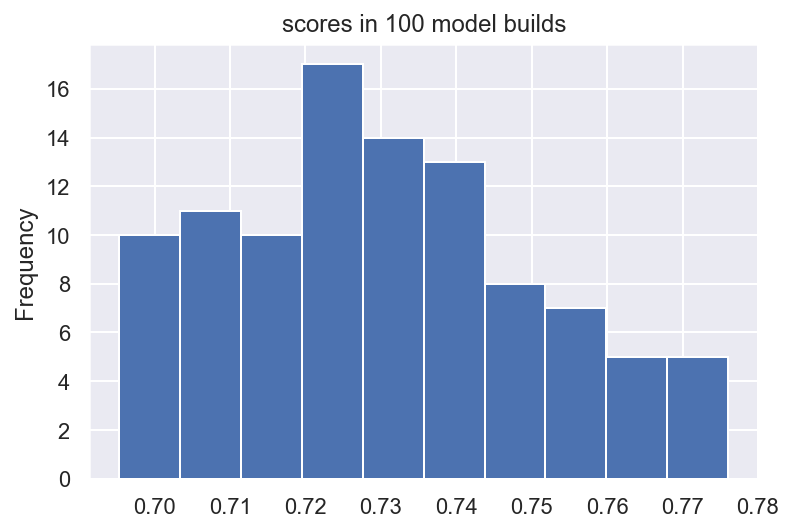

In [175]:
out = []
for _ in range(100):
    X_tr, X_ts, y_tr, y_ts = train_test_split(X, y, test_size=0.25)
    pl.fit(X_tr, y_tr)
    out.append(pl.score(X_ts, y_ts))
    
pd.Series(out).plot(kind='hist', title='scores in 100 model builds');

In [176]:
len(pd.get_dummies(X_tr[catcols]).columns)

48

Feature importance of categorical columns

In [177]:
# Feature importance of categorical columns
dict(zip(pd.get_dummies(X_tr[catcols]).columns, clf.feature_importances_))

{'POSTAL.CODE_AL': 0.0,
 'POSTAL.CODE_AR': 0.00826532498461927,
 'POSTAL.CODE_AZ': 0.005914889075121499,
 'POSTAL.CODE_CA': 0.006155310340304109,
 'POSTAL.CODE_CO': 0.004093472176496723,
 'POSTAL.CODE_CT': 0.0,
 'POSTAL.CODE_DC': 0.0034468600809328806,
 'POSTAL.CODE_DE': 0.0,
 'POSTAL.CODE_FL': 0.0065229748797209705,
 'POSTAL.CODE_GA': 0.0,
 'POSTAL.CODE_HI': 0.0,
 'POSTAL.CODE_IA': 0.0,
 'POSTAL.CODE_ID': 0.0034774381934137046,
 'POSTAL.CODE_IL': 0.004697089094070118,
 'POSTAL.CODE_IN': 0.0004666629167825102,
 'POSTAL.CODE_KS': 0.0027174265376355305,
 'POSTAL.CODE_KY': 0.0025976545326422667,
 'POSTAL.CODE_LA': 0.016511274521984837,
 'POSTAL.CODE_MA': 0.0016990873516909383,
 'POSTAL.CODE_MD': 0.003841080797408651,
 'POSTAL.CODE_ME': 0.0014903106052086574,
 'POSTAL.CODE_MI': 0.004026301894935068,
 'POSTAL.CODE_MN': 0.0,
 'POSTAL.CODE_MO': 0.0008973913321686521,
 'POSTAL.CODE_MS': 0.0,
 'POSTAL.CODE_MT': 0.0013435493150799598,
 'POSTAL.CODE_NC': 0.002649441075926502,
 'POSTAL.CODE_ND': 0

### Feature Engineering

Created OUTAGE.START and OUTAGE.RESTORATION columns to make engineering features from datetime columns cleaner

In [178]:
filtered_outages['OUTAGE.START'] = (pd.to_datetime(filtered_outages['OUTAGE.START.DATE'])
                                    + pd.to_timedelta(filtered_outages['OUTAGE.START.TIME'].astype(str)))

filtered_outages['OUTAGE.RESTORATION'] = (pd.to_datetime(filtered_outages['OUTAGE.RESTORATION.DATE']) + 
                                          pd.to_timedelta(filtered_outages['OUTAGE.RESTORATION.TIME'].astype(str)))
filtered_outages.head(2)

YEAR  MONTH U.S._STATE POSTAL.CODE NERC.REGION      CLIMATE.REGION  \
OBS                                                                       
1    2011    7.0  Minnesota          MN         MRO  East North Central   
2    2014    5.0  Minnesota          MN         MRO  East North Central   

     ANOMALY.LEVEL CLIMATE.CATEGORY    OUTAGE.START.DATE OUTAGE.START.TIME  \
OBS                                                                          
1             -0.3           normal  2011-07-01 00:00:00          17:00:00   
2             -0.1           normal  2014-05-11 00:00:00          18:38:00   

     ... POPDEN_URBAN POPDEN_UC POPDEN_RURAL AREAPCT_URBAN AREAPCT_UC  \
OBS  ...                                                                
1    ...         2279    1700.5         18.2          2.14        0.6   
2    ...         2279    1700.5         18.2          2.14        0.6   

      PCT_LAND  PCT_WATER_TOT  PCT_WATER_INLAND        OUTAGE.START  \
OBS                                                                   
1    91.592666       8.407334          5.478743 2011-07-01 17:00:00   
2    91.592666       8.407334          5.478743 2014-05-11 18:38:00   

     OUTAGE.RESTORATION  
OBS                      
1   2011-07-03 20:00:00  
2   2014-05-11 18:39:00  

[2 rows x 57 columns]

*Engineered Feature #1 ~ Extracting the day of the week out of the date columns*
    - Established two new features through this: START.DAY.OF.WEEK and RESTORATION.DAY.OF.WEEK

In [179]:
def get_weekday(dates):
    """
    converts column with datetime objects to day of the week
    input: np.array
    returns: np.array
    """
    dates = dates[0]
    s = pd.Series(dates)
    return s.dt.dayofweek.values

weekday_transformer = FunctionTransformer(get_weekday, validate = False)
baseline_outages['START.DAY.OF.WEEK']=weekday_transformer.fit_transform(filtered_outages['OUTAGE.START'].values.reshape(1, -1))
baseline_outages['RESTORATION.DAY.OF.WEEK']=weekday_transformer.fit_transform(filtered_outages['OUTAGE.RESTORATION'].values.reshape(1, -1))

# previous columns
display(filtered_outages[['OUTAGE.START', 'OUTAGE.RESTORATION']].head(2))
# engineered columns
display(baseline_outages[['START.DAY.OF.WEEK', 'RESTORATION.DAY.OF.WEEK']].head(2))


OUTAGE.START  OUTAGE.RESTORATION
OBS                                        
1   2011-07-01 17:00:00 2011-07-03 20:00:00
2   2014-05-11 18:38:00 2014-05-11 18:39:00

START.DAY.OF.WEEK  RESTORATION.DAY.OF.WEEK
OBS                                            
1                  4.0                      6.0
2                  6.0                      6.0

*Feature Engineered #2 ~ Extracting the hour from the time columns*
    - Established two new features through this: START.HOUR and RESTORATION.HOUR

In [180]:
def get_hour(times):
    """
    extracts the hour from columns with datetime objects 
    input: np.array
    returns: np.array
    """
    times = times[0]
    s = pd.Series(times)
    return s.dt.hour.values

hour_transformer = FunctionTransformer(get_hour, validate = False)
baseline_outages['START.HOUR']=hour_transformer.fit_transform(filtered_outages['OUTAGE.START'].values.reshape(1, -1))
baseline_outages['RESTORATION.HOUR']=hour_transformer.fit_transform(filtered_outages['OUTAGE.RESTORATION'].values.reshape(1, -1))

# previous columns
display(filtered_outages[['OUTAGE.START', 'OUTAGE.RESTORATION']].head(2))
# engineered columns
display(baseline_outages[['START.HOUR', 'RESTORATION.HOUR']].head(2))

OUTAGE.START  OUTAGE.RESTORATION
OBS                                        
1   2011-07-01 17:00:00 2011-07-03 20:00:00
2   2014-05-11 18:38:00 2014-05-11 18:39:00

START.HOUR  RESTORATION.HOUR
OBS                              
1          17.0              20.0
2          18.0              18.0

*Feature Engineered #3 ~ Extracting the number of days an outage lasted*

In [181]:
filtered_outages['days'] = filtered_outages['OUTAGE.RESTORATION'] - filtered_outages['OUTAGE.START']

def days(td):
    return td.days

baseline_outages['TOTAL.DAYS'] = filtered_outages['days'].apply(lambda x: days(x)).values

*Feature Engineered #4 ~ Indicates whether a state is rural dominant or urban dominant*
    - Uses POPPCT_URBAN (percentage of urban population in the state of the outage) to determine 
    which is more dominant
    - 1 indicates Urban dominant and 0 indicated Rural dominant

In [182]:
popden_urban = filtered_outages['POPPCT_URBAN'].values.reshape(1, -1)

binarizer_city_type = Binarizer(threshold = 50)
baseline_outages['IS.URBAN']=binarizer_city_type.fit_transform(popden_urban)[0]

# engineered feature 
baseline_outages[['IS.URBAN']].head(2)

IS.URBAN
OBS          
1         1.0
2         1.0

### Model Testing

In [183]:
# Drop the POPPCT_URBAN as the IS.URBAN Provide concise verson of the information
baseline_outages = baseline_outages.drop(['POPPCT_URBAN'], axis =1)

##### Testing Baseline Model With Engineered Features*
    - New Model Includes: PCA to handle highly correlated columns

In [184]:
catcols_engin = baseline_outages.drop(baseline_outages.select_dtypes(exclude = 'object'), axis = 1).columns
numcols_engin = baseline_outages.drop(baseline_outages.select_dtypes(exclude = 'number'), axis = 1).columns

cats_en = Pipeline([
    ('imp', SimpleImputer(strategy = 'constant', fill_value = 'NULL')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse = False)),
    ('pca', PCA(svd_solver = 'full', n_components = 0.99)) 
])

ct = ColumnTransformer([
    ('catcols', cats_en, catcols_engin),
    ('numcols', SimpleImputer(strategy = 'constant', fill_value = 0), numcols_engin)
])

clf = DecisionTreeClassifier()

pl_decision = Pipeline([('feats', ct), ('classify', clf)])

X_engin = baseline_outages

Xe_tr, Xe_ts, ye_tr, ye_ts = train_test_split(X_engin, y, test_size = 0.3)

pl_decision.fit(Xe_tr, ye_tr)
pl_decision.score(Xe_ts, ye_ts)

0.7852494577006508

##### Evaluation Metric of Baseline Model with Engineered Features and PCA

In [185]:
scores = dict()
scores['test_accuracy'] = (accuracy_score(ye_ts, pl_decision.predict(Xe_ts)))
scores['validation_accuracy'] = np.mean(cross_val_score(pl_decision, Xe_tr, ye_tr, cv=4))
scores

{'test_accuracy': 0.7852494577006508,
 'validation_accuracy': 0.7464801919769184}

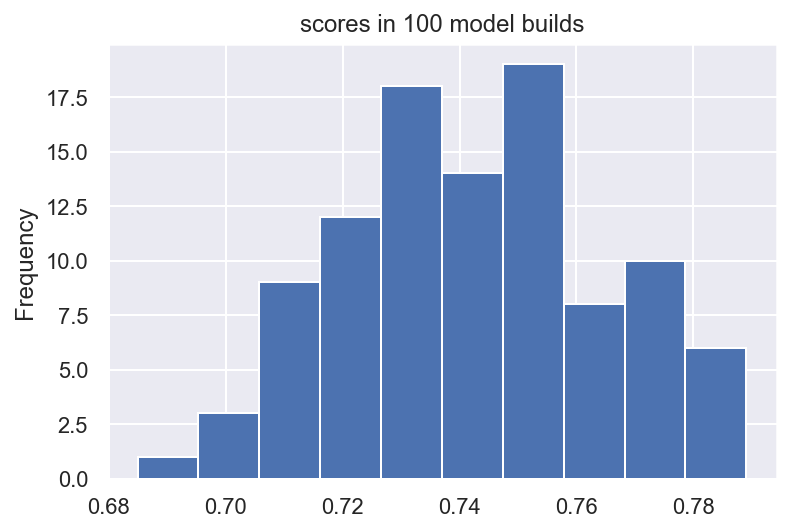

In [186]:
# Distribution of Accuracy With Engineered Features

out = []
for _ in range(100):
    Xe_tr, Xe_ts, ye_tr, ye_ts = train_test_split(X_engin, y, test_size = 0.25)
    pl_decision.fit(Xe_tr, ye_tr)
    out.append(pl_decision.score(Xe_ts, ye_ts))
    
pd.Series(out).plot(kind='hist', title='scores in 100 model builds');

#### Different Models:
(We tested different models to see if we could get a higher accuracy)

###### Random Forest Classifier

In [187]:
import warnings
warnings.filterwarnings("ignore")

In [188]:
cats_en = Pipeline([
    ('imp', SimpleImputer(strategy = 'constant', fill_value = 'NULL')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse = False)),
    ('pca', PCA(svd_solver = 'full', n_components = 0.99)) #to handle highly correlated columns
])

ct = ColumnTransformer([
    ('catcols', cats_en, catcols_engin),
    ('numcols', SimpleImputer(strategy = 'constant', fill_value = 0), numcols_engin)
])

clf = RandomForestClassifier()

pl = Pipeline([('feats', ct), ('classify', clf)])

X_engin = baseline_outages
Xe_tr, Xe_ts, ye_tr, ye_ts = train_test_split(X_engin, y, test_size = 0.3)

pl.fit(Xe_tr, ye_tr)
pl.score(Xe_ts, ye_ts)

0.7830802603036876

##### Evaluation Metric of Random Forest Classifier 

In [189]:
scores = dict()
scores['test_accuracy'] = (accuracy_score(ye_ts, pl.predict(Xe_ts)))
scores['validation_accuracy'] = np.mean(cross_val_score(pl, Xe_tr, ye_tr, cv=4))
scores

{'test_accuracy': 0.7830802603036876,
 'validation_accuracy': 0.7893767685734894}

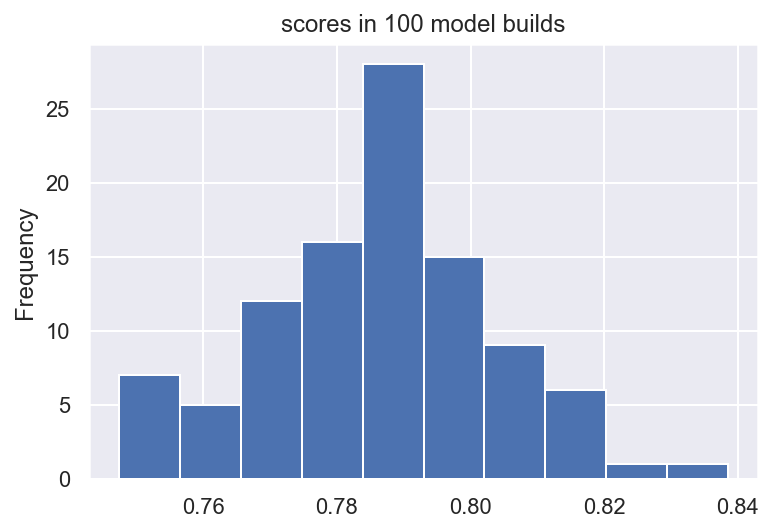

In [190]:
out = []
for _ in range(100):
    Xe_tr, Xe_ts, ye_tr, ye_ts = train_test_split(X_engin, y, test_size = 0.25)
    pl.fit(Xe_tr, ye_tr)
    out.append(pl.score(Xe_ts, ye_ts))

pd.Series(out).plot(kind='hist', title='scores in 100 model builds');

*Finding Best Parameters for Random Forest*

In [192]:
parameters = {
    'classify__max_depth': np.arange(2,25,20), 
    'classify__min_samples_split':[2,3,5,7,10,15,20],
    'classify__min_samples_leaf':[2,3,5,7,10,15,20]
}

In [193]:
g = GridSearchCV(pl, parameters, cv = 5)
g.fit(Xe_tr, ye_tr)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('feats',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('catcols',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imp',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                           

In [194]:
g.best_params_

{'classify__max_depth': 22,
 'classify__min_samples_leaf': 2,
 'classify__min_samples_split': 5}

##### RandomForest Pipeline with New Parameters

In [197]:
cats_en = Pipeline([
    ('imp', SimpleImputer(strategy = 'constant', fill_value = 'NULL')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse = False)),
    ('pca', PCA(svd_solver = 'full', n_components = 0.99)) #to handle highly correlated columns
])

ct = ColumnTransformer([
    ('catcols', cats_en, catcols_engin),
    ('numcols', SimpleImputer(strategy = 'constant', fill_value = 0), numcols_engin)
])

clf = RandomForestClassifier(max_depth = 22, min_samples_leaf = 3, min_samples_split = 7)

pl = Pipeline([('feats', ct), ('classify', clf)])

X_engin = baseline_outages
Xe_tr, Xe_ts, ye_tr, ye_ts = train_test_split(X_engin, y, test_size = 0.3)

pl.fit(Xe_tr, ye_tr)
pl.score(Xe_ts, ye_ts)

0.7874186550976139

##### Evaluation Metric of Random Forest Classifier With Optimized Parameters

In [198]:
scores = dict()
scores['test_accuracy'] = (accuracy_score(ye_ts, pl.predict(Xe_ts)))
scores['validation_accuracy'] = np.mean(cross_val_score(pl, Xe_tr, ye_tr, cv=4))
scores

{'test_accuracy': 0.7874186550976139,
 'validation_accuracy': 0.7529996393497198}

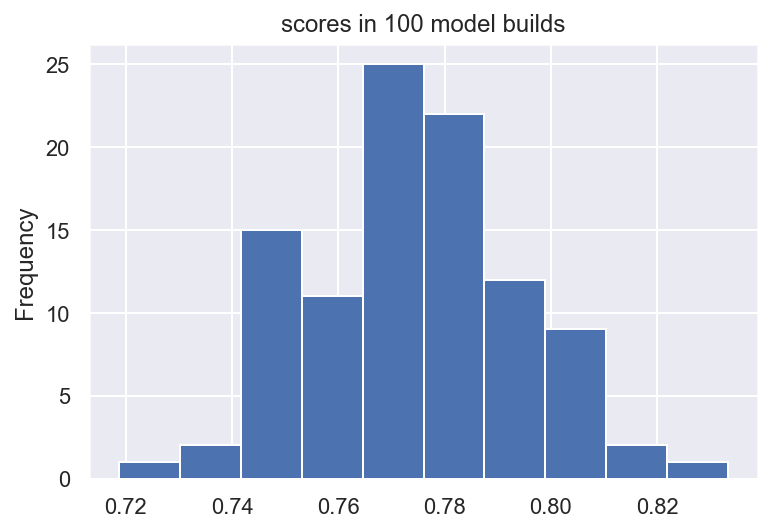

In [199]:
# Distribution for RandomForest With Best Parameters
out = []
for _ in range(100):
    Xe_tr, Xe_ts, ye_tr, ye_ts = train_test_split(X_engin, y, test_size = 0.25)
    pl.fit(Xe_tr, ye_tr)
    out.append(pl.score(Xe_ts, ye_ts))
    
pd.Series(out).plot(kind='hist', title='scores in 100 model builds');

##### KNeighborsClassifier

In [200]:
cats_en = Pipeline([
    ('imp', SimpleImputer(strategy = 'constant', fill_value = 'NULL')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse = False)),
    ('pca', PCA(svd_solver = 'full', n_components = 0.99)) #to handle highly correlated columns
])

ct = ColumnTransformer([
    ('catcols', cats_en, catcols_engin),
    ('numcols', SimpleImputer(strategy = 'constant', fill_value = 0), numcols_engin)
])

clf = KNeighborsClassifier()

pl = Pipeline([('feats', ct), ('classify', clf)])

X_engin = baseline_outages
Xe_tr, Xe_ts, ye_tr, ye_ts = train_test_split(X_engin, y, test_size = 0.3)

pl.fit(Xe_tr, ye_tr)
pl.score(Xe_ts, ye_ts)

0.7310195227765727

##### Evaluation Metric of KNeighersClassifier 

In [201]:
scores = dict()
scores['test_accuracy'] = (accuracy_score(ye_ts, pl.predict(Xe_ts)))
scores['validation_accuracy'] = np.mean(cross_val_score(pl, Xe_tr, ye_tr, cv=4))
scores

{'test_accuracy': 0.7310195227765727,
 'validation_accuracy': 0.7437128946346336}

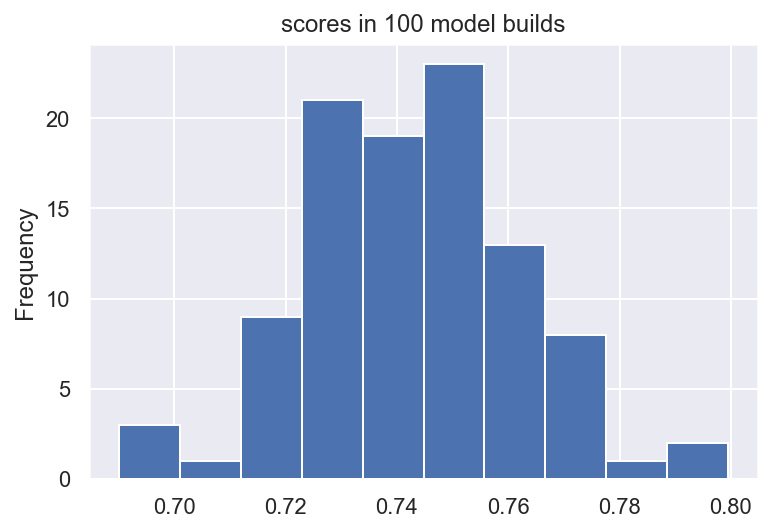

In [202]:
# Distribution For KNN
out = []
for _ in range(100):
    Xe_tr, Xe_ts, ye_tr, ye_ts = train_test_split(X_engin, y, test_size = 0.25)
    pl.fit(Xe_tr, ye_tr)
    out.append(pl.score(Xe_ts, ye_ts))
    
pd.Series(out).plot(kind='hist', title='scores in 100 model builds');

### Final Model
Much of the code below is presented above in more detail as we were testing out different models. In order to avoid repetitive graphs, we left the graphs above. Please refer to those for more visualizations and numbers.

In [204]:
cats_en = Pipeline([
    ('imp', SimpleImputer(strategy = 'constant', fill_value = 'NULL')),
    ('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse = False)),
    ('pca', PCA(svd_solver = 'full', n_components = 0.99)) #to handle highly correlated columns
])

ct = ColumnTransformer([
    ('catcols', cats_en, catcols_engin),
    ('numcols', SimpleImputer(strategy = 'constant', fill_value = 0), numcols_engin)
])

clf = RandomForestClassifier()

pl = Pipeline([('feats', ct), ('classify', clf)])

X_engin = baseline_outages
Xe_tr, Xe_ts, ye_tr, ye_ts = train_test_split(X_engin, y, test_size = 0.3)

pl.fit(Xe_tr, ye_tr)
pl.score(Xe_ts, ye_ts)

0.806941431670282

### Fairness Evaluation

In [210]:
from sklearn import metrics

In [211]:
preds = pl.predict(Xe_ts)
results = Xe_ts
results['prediction'] = preds
results['tag'] = ye_ts

##### Tested The Accuracy Parity Between the Amount Customers Affected
    - >50,000 = large group of people
    - <50,000 = small group of people

In [212]:
results['is_large_impact'] = (results['CUSTOMERS.AFFECTED'] >= 50000).replace({True:'many', False:'little'})
results['is_correct'] = (results['prediction'] == results['tag'])
results.groupby('is_large_impact').count()[['is_correct']]

is_correct
is_large_impact            
little                  234
many                    227

In [213]:
# Accuracy Parity
(    results
    .groupby('is_large_impact')
    .apply(lambda x: metrics.accuracy_score(x.tag, x.prediction))
    .rename('accuracy')
    .to_frame()
)

accuracy
is_large_impact          
little           0.717949
many             0.898678

1.0


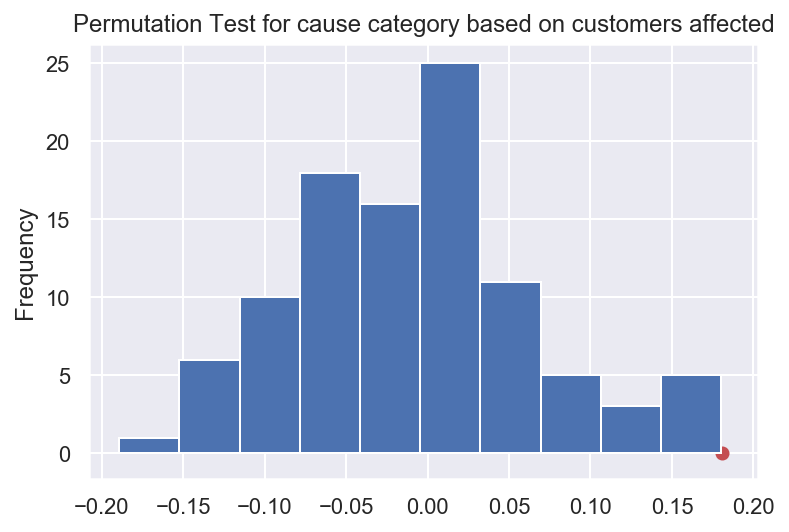

In [215]:
obs = results.groupby('is_large_impact').apply(lambda x: metrics.accuracy_score(x.tag, x.prediction)).diff().iloc[-1]

# permutation test
metrs = []
for _ in range(100):
    s = (
        results[['is_large_impact', 'prediction', 'tag']]
        .assign(is_large_impact=results.is_large_impact.sample(frac=1.0, replace=False).reset_index(drop=True))
        .groupby('is_large_impact')
        .apply(lambda x: metrics.accuracy_score(x.tag, x.prediction))
        .diff()
        .iloc[-1]
    )
    
    metrs.append(s)
    
print(pd.Series(metrs <= obs).mean())
pd.Series(metrs).plot(kind='hist', title='Permutation Test for cause category based on customers affected')
plt.scatter(obs, 0, c='r');